In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
df=pd.read_csv('Quarterly_Census_of_Employment_and_Wages__QCEW_.csv')

In [ ]:
#industry type#

In [ ]:
code={
    '10':'Not Classified',
    '11':'Agriculture, Forestry, Fishing and Hunting',
    '21':'Mining',
    '22':'Utilities',
    '23':'Construction',
    '31':'Manufacturing',
    '32':'Manufacturing',
    '33':'Manufacturing',
    '42':'Wholesale Trade',
    '44':'Retail Trade',
    '45':'Retail Trade',
    '48':'Transportation and Warehousing',
    '49':'Transportation and Warehousing',
    '51':'Information',
    '52':'Finance and Insurance',
    '53':'Real Estate Rental and Leasing',
    '54':'Professional, Scientific, and Technical Services',
    '55':'Management of Companies and Enterprises',
    '56':'Administrative and Support and Waste Management and Remediation Services',
    '61':'Educational Services',
    '62':'Health Care and Social Assistance',
    '71':'Arts, Entertainment, and Recreation',
    '72':'Accommodation and Food Services',
    '81':'Other Services (except Public Administration)',
    '92':'Public Administration'
}

In [ ]:
a=df['NAICS Code'].map(lambda x:x[:2])
df.insert(loc=7, column='First 2 digits of NAICS Code', value=a)
b=df['First 2 digits of NAICS Code'].map(code)
df['Industry']=b

In [ ]:
#Data Cleaning

In [ ]:
df2=df.drop(df[df['Area Type']!='County'].index)

In [ ]:
df3=df2.drop(df2[df2['Quarter']!='Annual'].index)

In [ ]:
df4=df3.drop(df3[df3['Ownership']=='Total Covered'].index)

In [ ]:
df5=df4.drop(df4[df4['Industry Name']=='Total, All Industries'].index)

In [ ]:
df6=df5.drop(df5[df5['Average Weekly Wages']==0.0].index)

In [ ]:
#Visualization

In [ ]:
dfx=pd.DataFrame(columns=['Year','Industry','Average Annual Wages'])

In [ ]:
indtrs=['Agriculture, Forestry, Fishing and Hunting',
    'Mining',
    'Utilities',
    'Construction',
    'Manufacturing',
    'Wholesale Trade',
    'Retail Trade',
    'Transportation and Warehousing',
    'Information',
    'Finance and Insurance',
    'Real Estate Rental and Leasing',
    'Professional, Scientific, and Technical Services',
    'Management of Companies and Enterprises',
    'Administrative and Support and Waste Management and Remediation Services',
    'Educational Services',
    'Health Care and Social Assistance',
    'Arts, Entertainment, and Recreation',
    'Accommodation and Food Services',
    'Other Services (except Public Administration)',
    'Public Administration',
    'Not Classified']

In [ ]:
for i in range(2004,2022):
    dfx1=df6.drop(df6[df6['Year']!=i].index)
    for j in indtrs:
        dfx2=dfx1.drop(dfx1[dfx1['Industry']!=j].index)
        avg=dfx2['Total Wages (All Workers)'].sum()/dfx2['Average Monthly Employment'].sum()
        data={
            'Year':i,
            'Industry':j,
            'Average Annual Wages':avg
        }
        data=pd.DataFrame(data,index=[0])
        dfx=pd.concat([dfx,data],ignore_index=True)

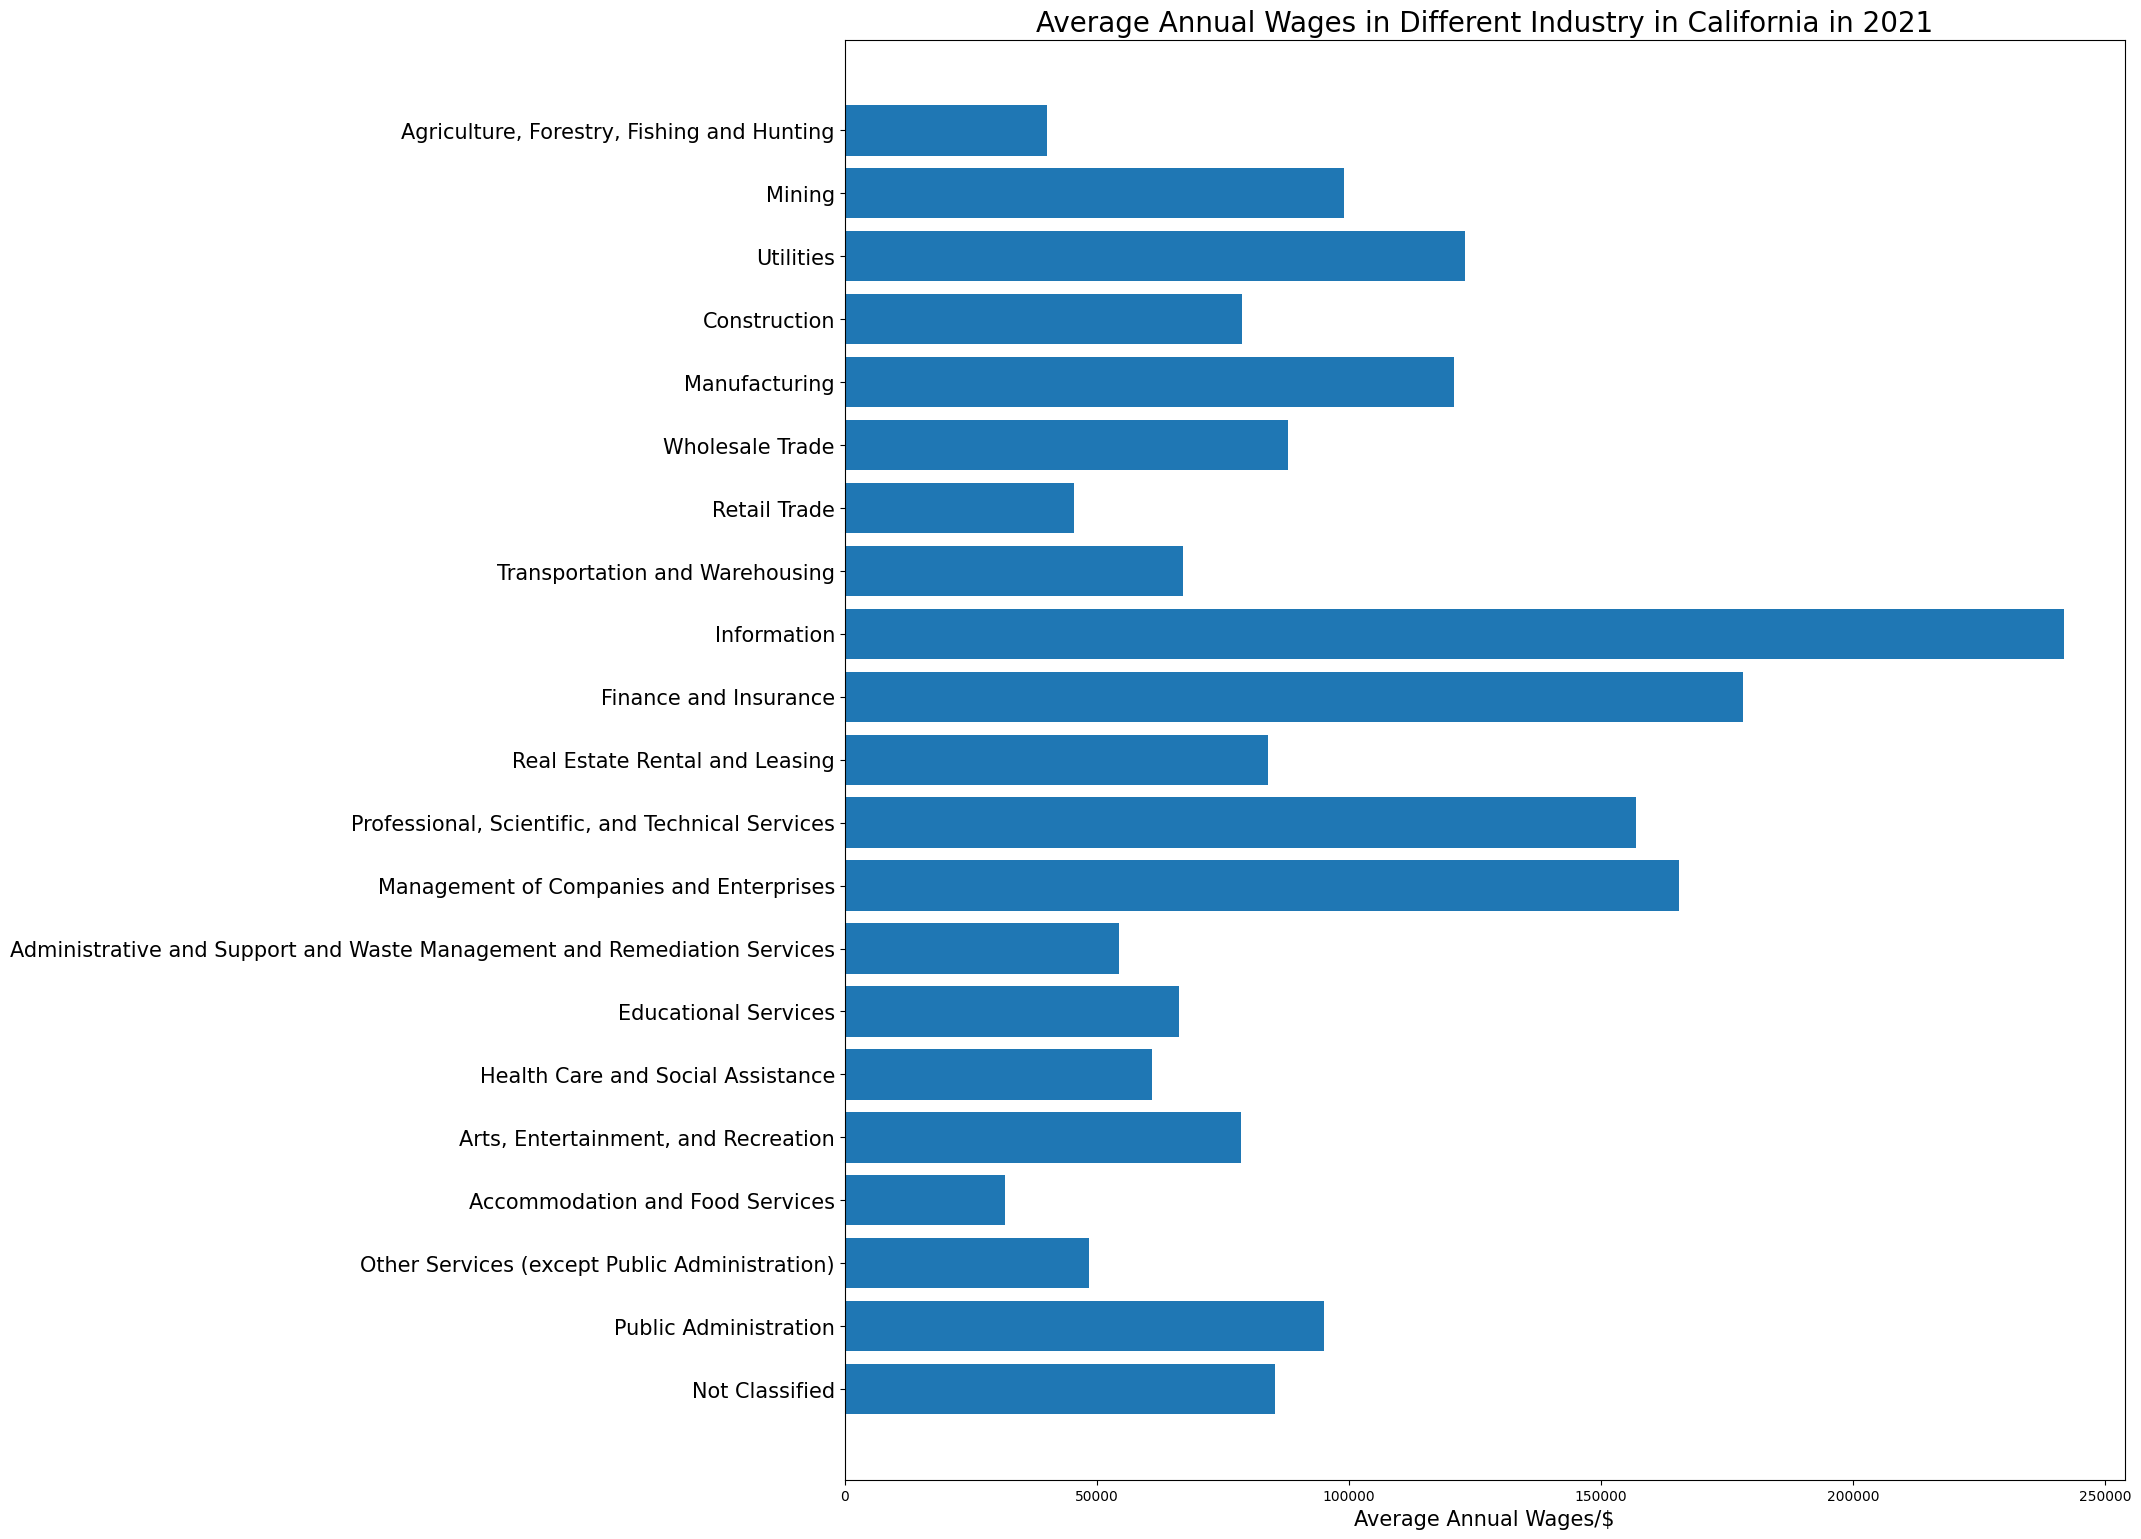

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,3])
wage = [dfx.loc[(dfx['Year']==2021)&(dfx['Industry']==i)]['Average Annual Wages'].max() for i in indtrs]
ax.barh(indtrs[::-1],wage[::-1])
plt.xlabel('Average Annual Wages/$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Average Annual Wages in Different Industry in California in 2021',fontsize = 20)
plt.show()

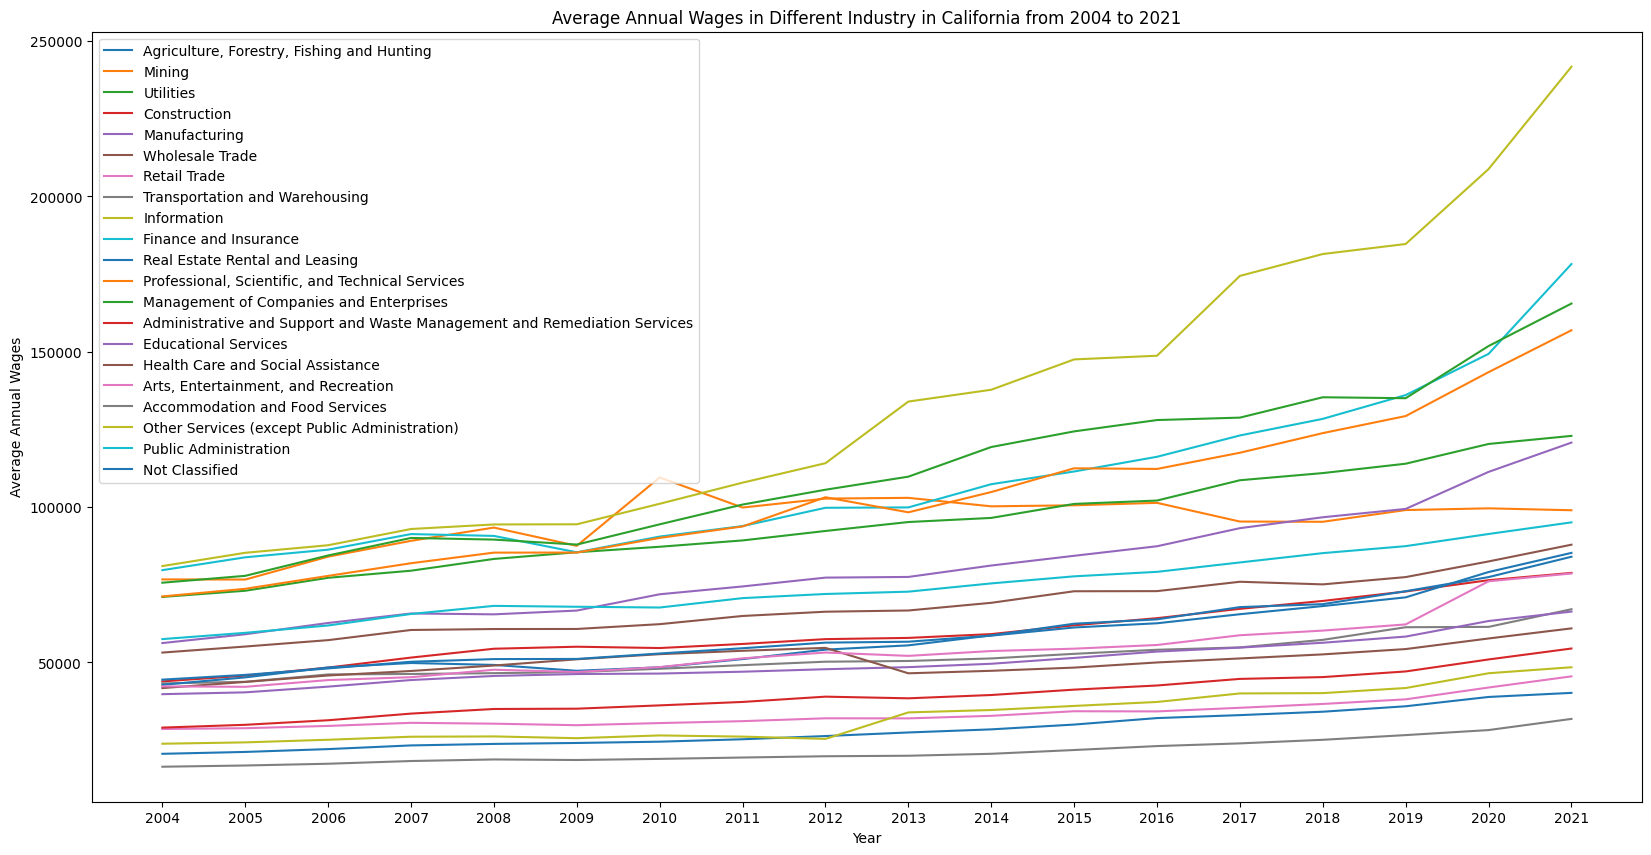

In [ ]:
x = list(range(2004,2022,1))
plt.figure(figsize=(20, 10))
for i in indtrs:
    y=[]
    for year in x:
        dc=dfx[dfx['Year']==year]
        y.append(dc[dc['Industry']==i]['Average Annual Wages'].max())
    plt.plot(x, y, markersize=10)
plt.xticks(x)
plt.title('Average Annual Wages in Different Industry in California from 2004 to 2021')
plt.xlabel('Year')
plt.ylabel('Average Annual Wages')
plt.legend(indtrs)
plt.show()

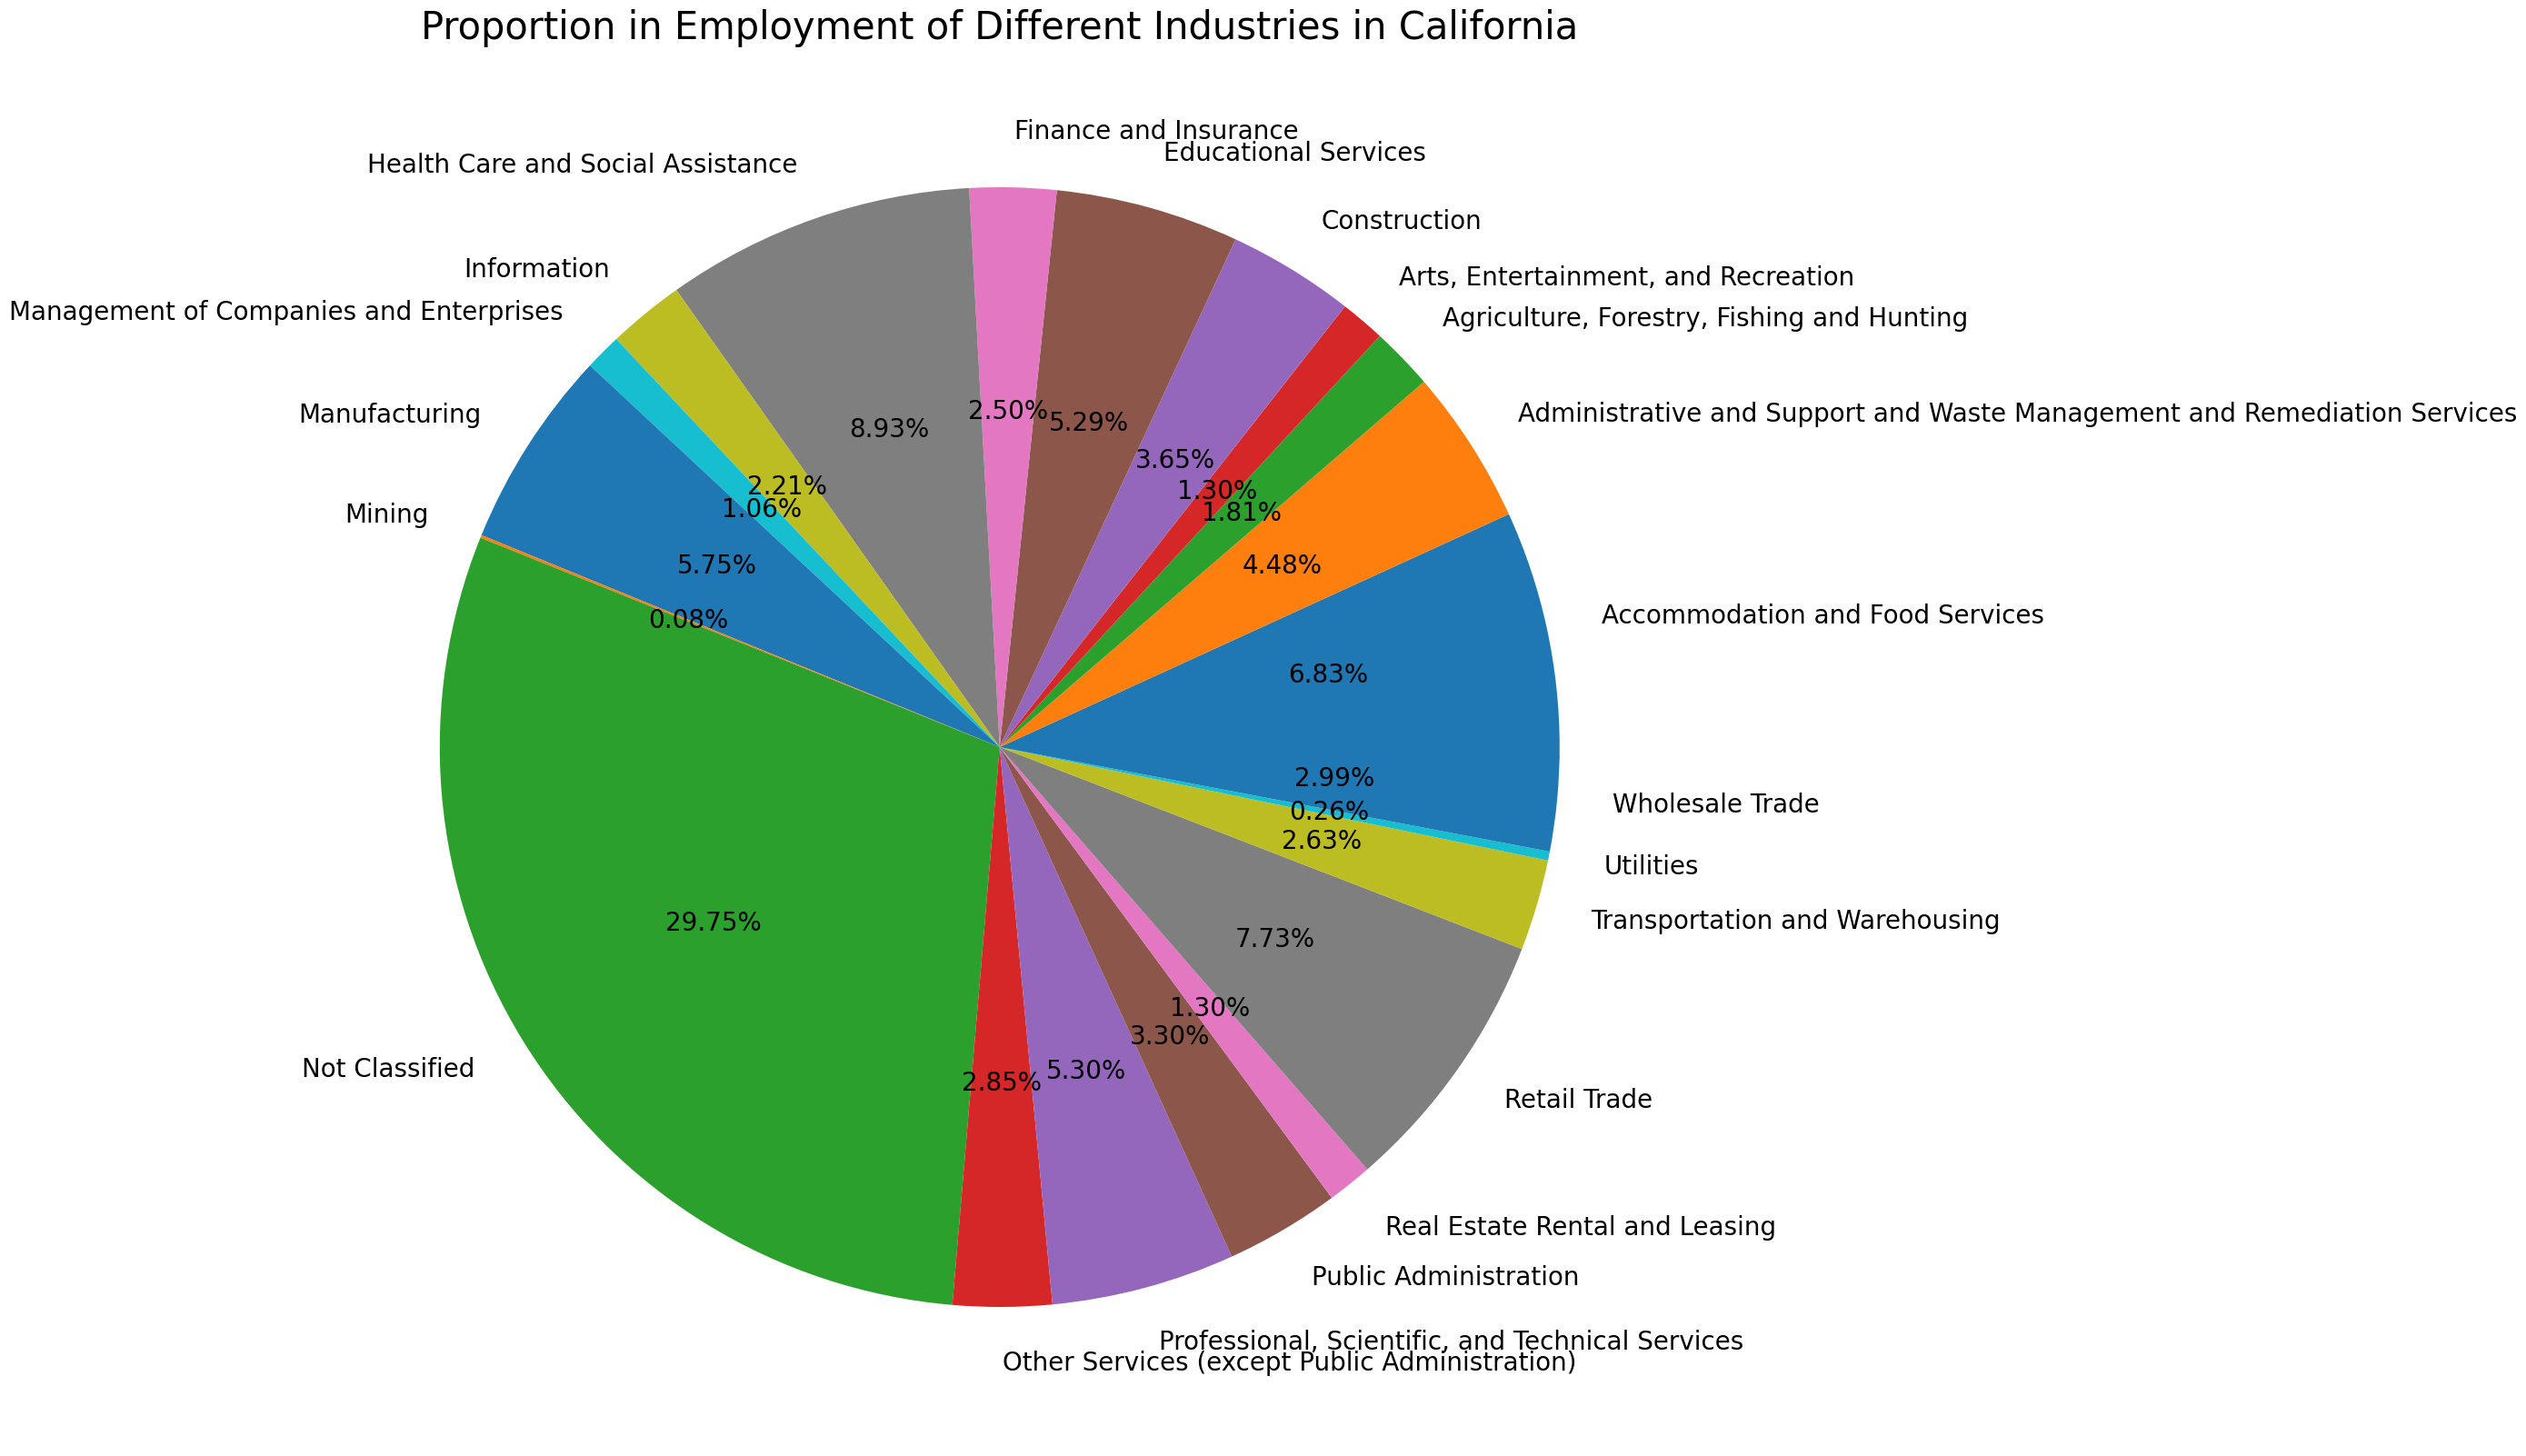

In [ ]:
dfy=df5[["Average Monthly Employment","Industry",]].groupby(['Industry']).sum()
plt.figure(figsize=(20, 20))
plt.pie(dfy["Average Monthly Employment"],labels=dfy.index,autopct="%.2f%%",textprops={'fontsize': 20})
plt.title('Proportion in Employment of Different Industries in California',fontsize=30)
plt.show()

In [ ]:
dfz=dfy[dfy.index!='Not Classified']


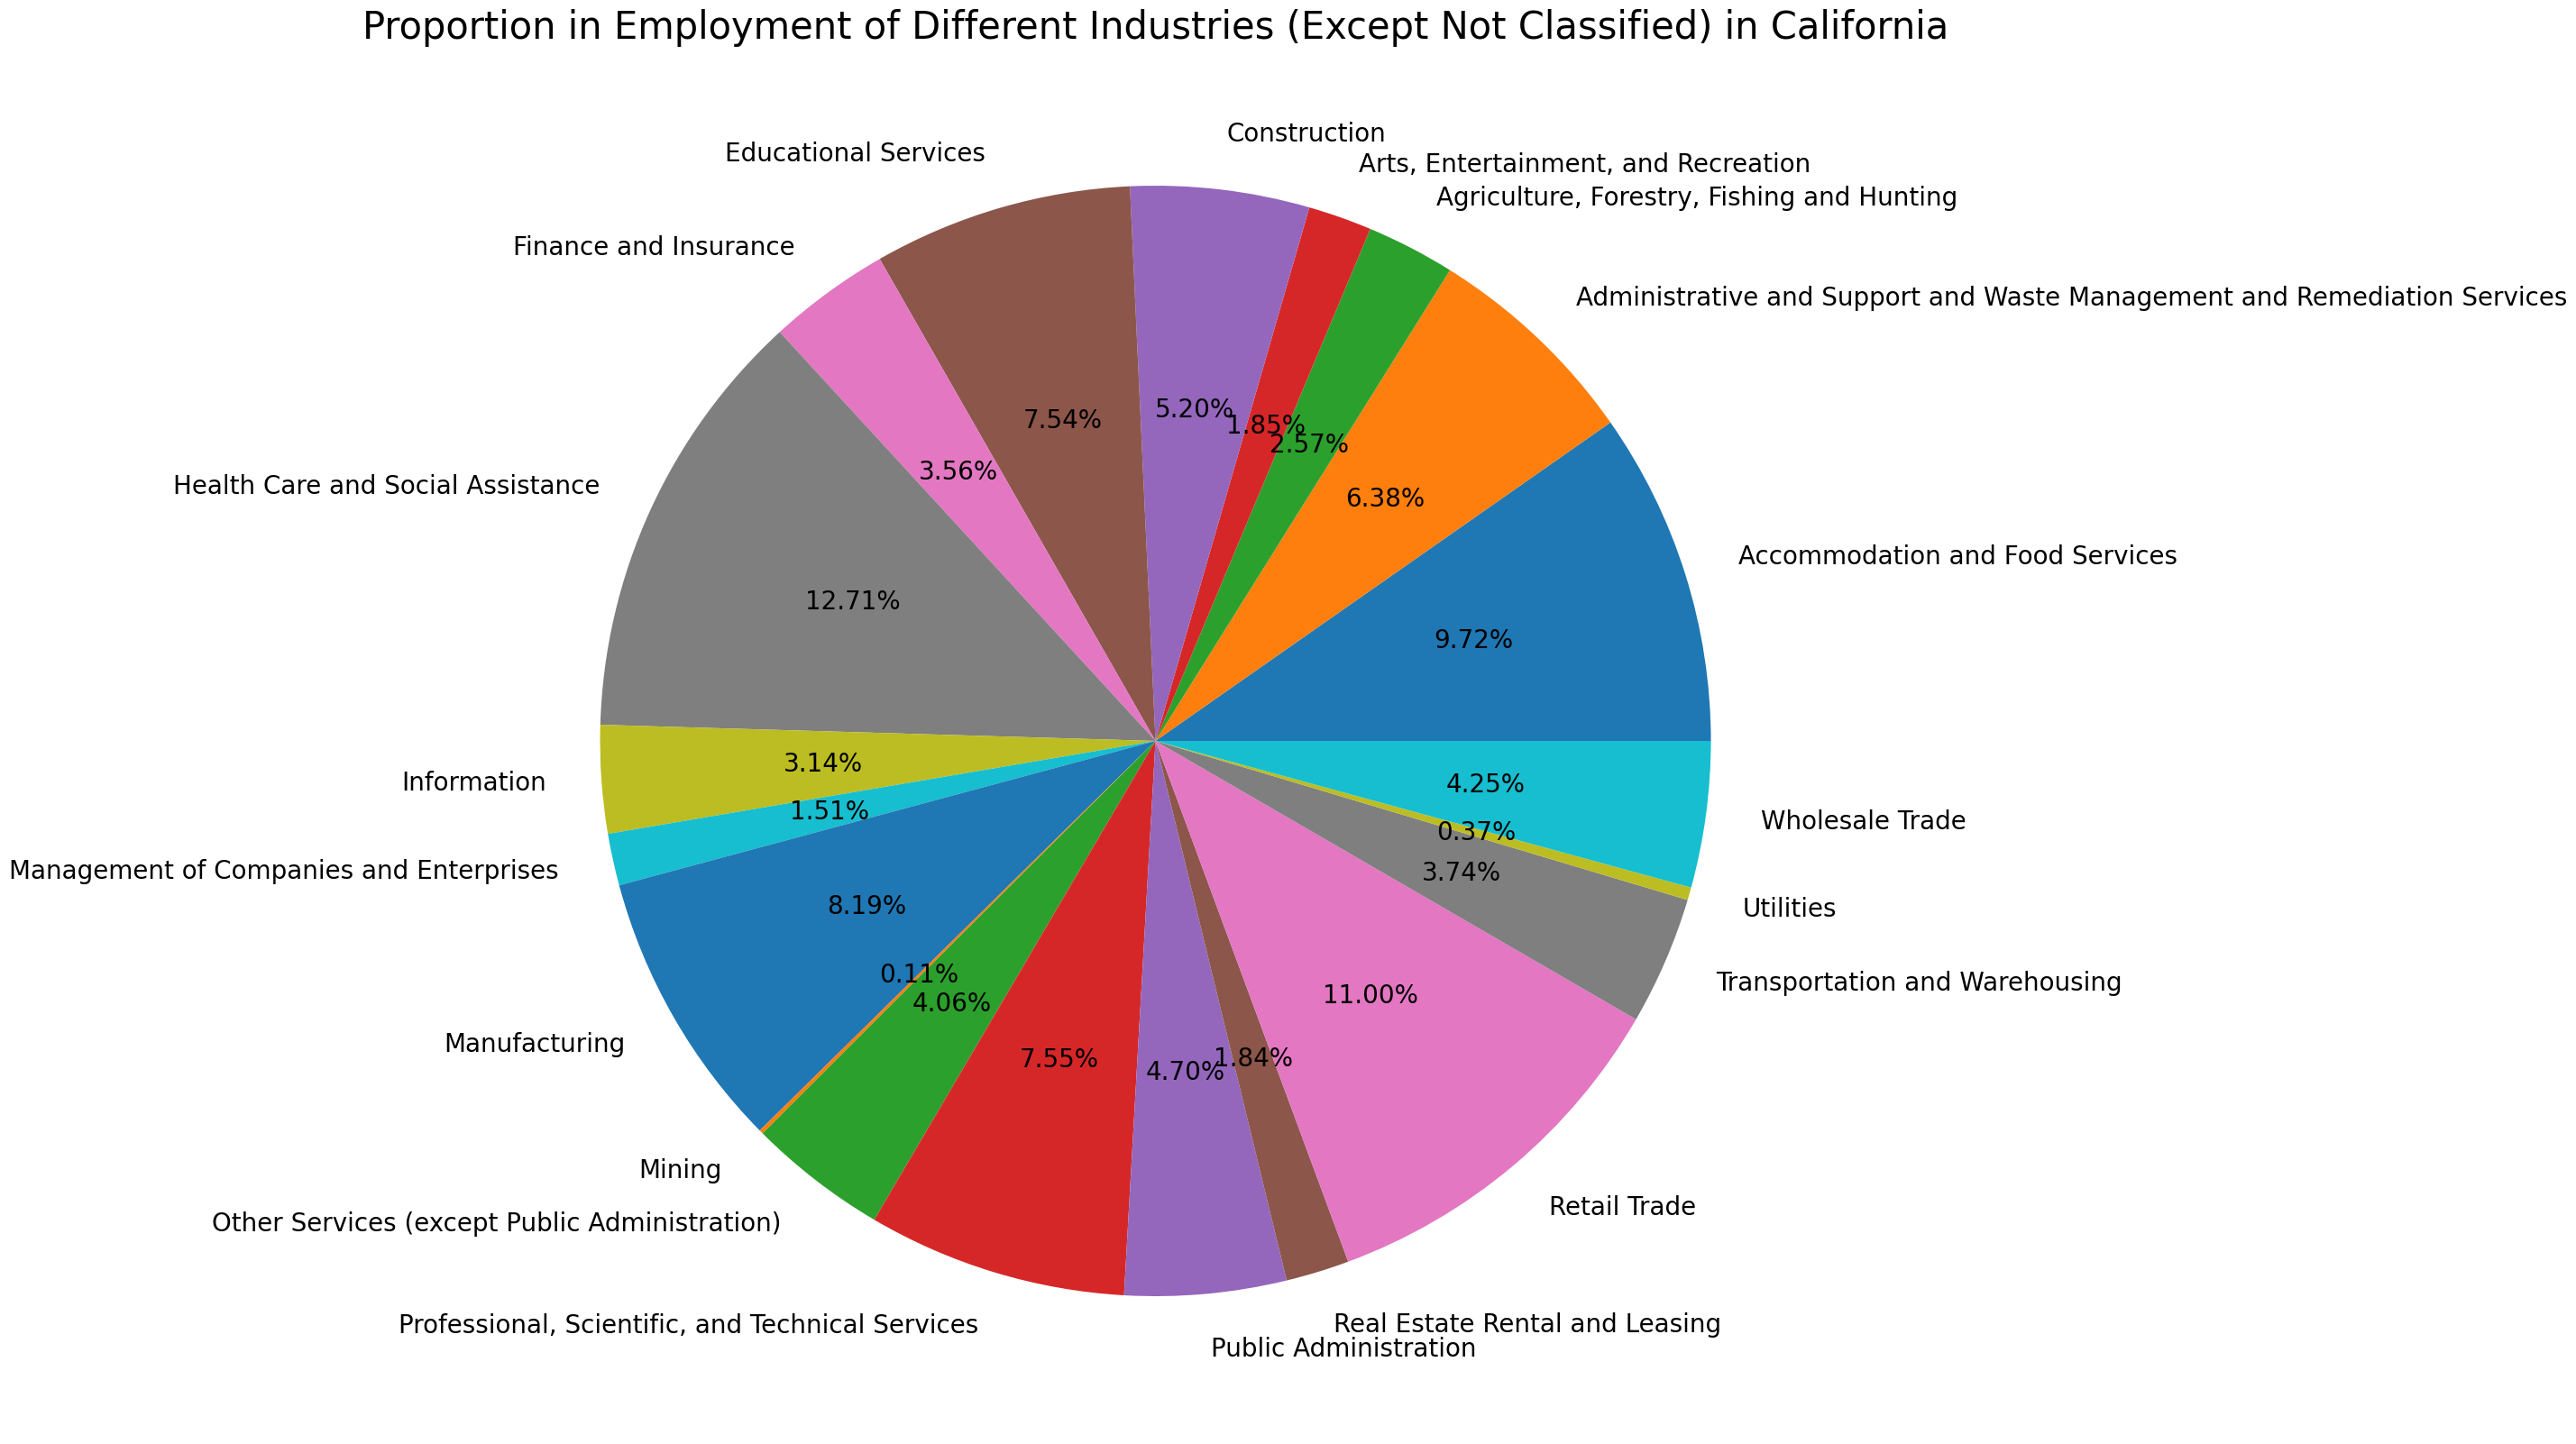

In [ ]:
plt.figure(figsize=(20, 20))
plt.pie(dfz["Average Monthly Employment"],labels=dfz.index,autopct="%.2f%%",textprops={'fontsize': 20})
plt.title('Proportion in Employment of Different Industries (Except Not Classified) in California',fontsize=30)
plt.show()

In [ ]:
dfi=df5
dfi['NAICS Code(int)']=dfi['NAICS Code'].map(lambda x:int(x[:2])if len(x)>=3 and x[2]=='-' else int(x))
dfi=dfi[dfi['NAICS Code(int)']<100]
dfi=dfi[["Average Monthly Employment","Industry","Year"]].groupby(['Industry',"Year"]).sum()
dfi

Average Monthly Employment
Industry                        Year                            
Accommodation and Food Services 2004                     1189082
                                2005                     1224123
                                2006                     1267300
                                2007                     1300649
                                2008                     1308571
...                                                          ...
Wholesale Trade                 2017                      645736
                                2018                      636714
                                2019                      629744
                                2020                      573942
                                2021                      581143

[360 rows x 1 columns]

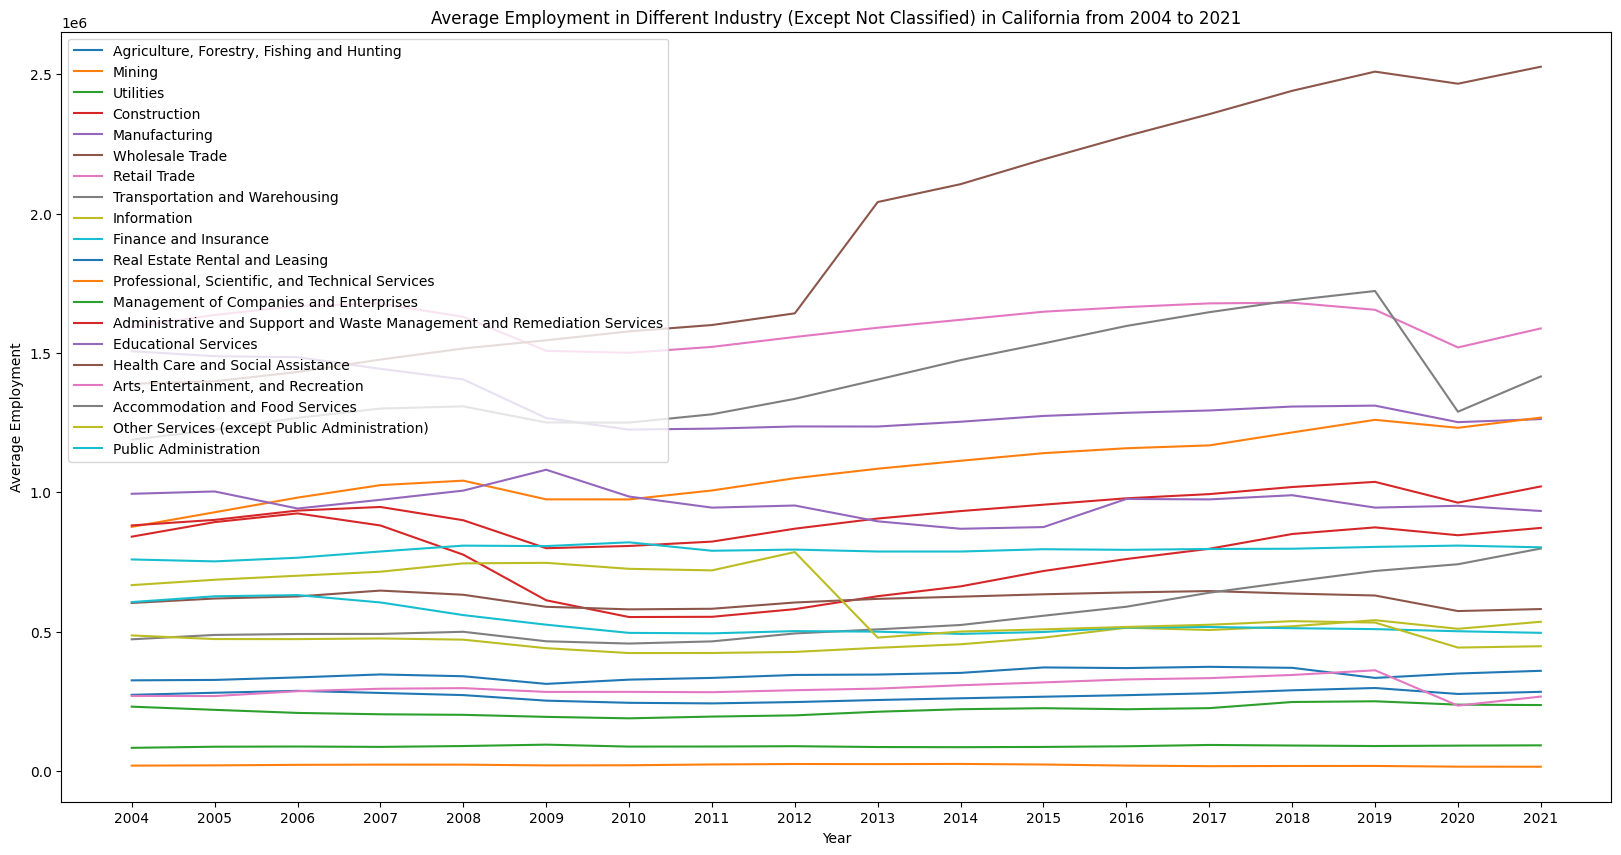

In [ ]:
x = list(range(2004,2022,1))
l = indtrs[:]
l.remove('Not Classified')
plt.figure(figsize=(20, 10))
for i in l:
    y=[]
    dc=dfi.loc[i]
    for year in x:
        y.append(dc.loc[year]['Average Monthly Employment'])
    plt.plot(x, y, markersize=10)
plt.xticks(x)
plt.title('Average Employment in Different Industry (Except Not Classified) in California from 2004 to 2021')
plt.xlabel('Year')
plt.ylabel('Average Employment')
plt.legend(indtrs)
plt.show()

In [ ]:
#ownership#

In [ ]:
data = df

In [ ]:
# data[ (data["Year"]==2004)  & (data["Area Type"]=="California - Statewide") & (data["Ownership"]=="Private")  & (data["Quarter"]=="Annual") ]

In [ ]:
county_data=data[ (data["Area Type"]=="County") & (data["Quarter"]=="Annual") & (data["Industry Name"]!="Total, All Industries")]
State_data=data[ (data["Area Type"]=="California - Statewide")& (data["Quarter"]=="Annual") & (data["Industry Name"]=="Total, All Industries")]
US_data=data[ (data["Area Type"]=="United States")& (data["Quarter"]=="Annual") & (data["Industry Name"]=="Total, All Industries")]

Text(0.5, 1.0, 'Proportion of different Ownership in California')

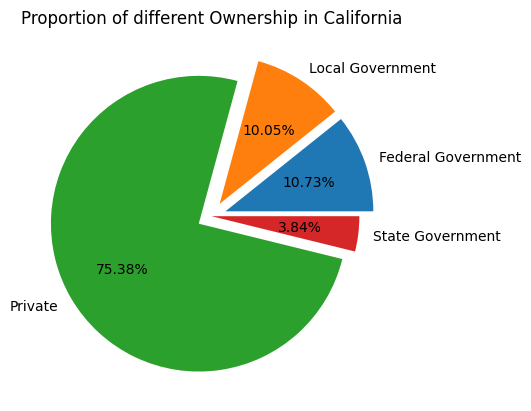

In [ ]:
State_data2=data[ (data["Area Type"]=="California - Statewide")& (data["Quarter"]=="Annual") & (data["Industry Name"]!="Total, All Industries")]
State_data2_ownership_count=State_data2[["Industry Name", "Ownership"]].groupby(['Ownership']).count()
plt.pie(State_data2_ownership_count["Industry Name"],labels=State_data2_ownership_count.index,autopct="%.2f%%", explode=[0.1,0.1,0.1,0])
plt.title('Proportion of different Ownership in California')

Text(0.5, 1.0, 'Proportion of different Ownership in the United States')

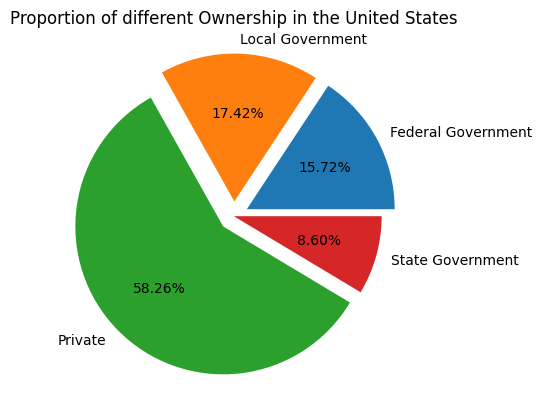

In [ ]:
US_data2=data[ (data["Area Type"]=="United States")& (data["Quarter"]=="Annual") & (data["Industry Name"]!="Total, All Industries")]
US_data2_ownership_count=US_data2[["Industry Name", "Ownership"]].groupby(['Ownership']).count()
plt.pie(US_data2_ownership_count["Industry Name"],labels=US_data2_ownership_count.index,autopct="%.2f%%", explode=[0.1,0.1,0.1,0])
plt.title('Proportion of different Ownership in the United States')

In [ ]:
county_ownership_employment_data=county_data[["Year", "Ownership", "Average Monthly Employment"]]
county_ownership_employment_average = county_ownership_employment_data.groupby(['Ownership','Year']).mean()

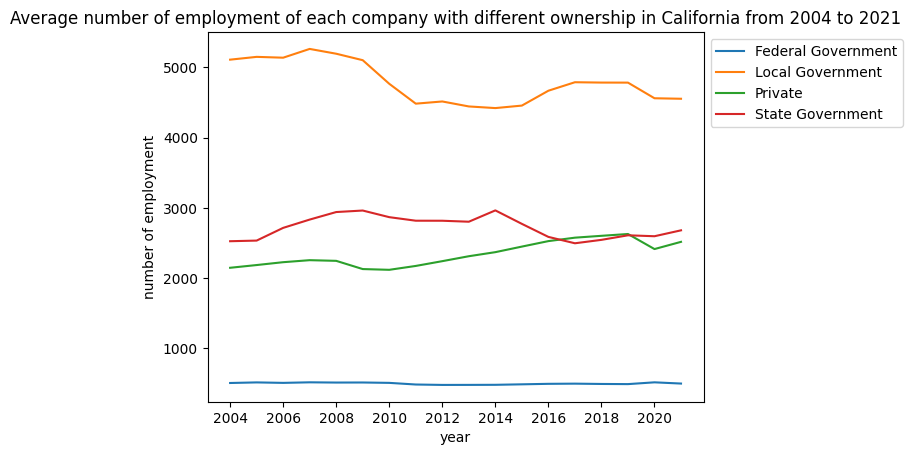

In [ ]:
for Ownership in ['Federal Government','Local Government','Private','State Government']:
    item=county_ownership_employment_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('number of employment')
plt.xlabel('year')
plt.title("Average number of employment of each company with different ownership in California from 2004 to 2021")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

In [ ]:
State_ownership_employment_data=State_data[["Year", "Ownership", "Average Monthly Employment"]]
State_ownership_employment_average = State_ownership_employment_data.groupby([ 'Ownership', 'Year']).mean()
State_ownership_employment_total=State_ownership_employment_average.loc["Total Covered",:]
State_ownership_employment_average=State_ownership_employment_average.drop(level='Ownership',index=["Total Covered"])

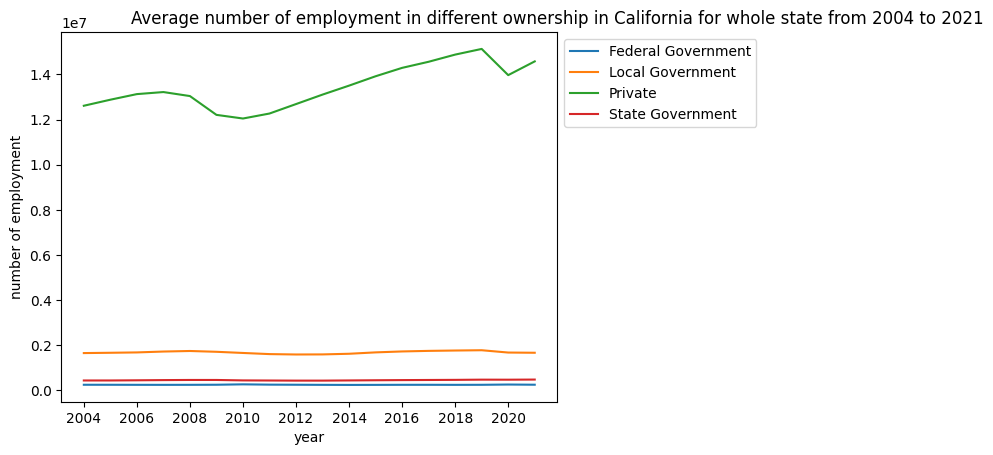

In [ ]:
for Ownership in ['Federal Government','Local Government','Private','State Government']:
    item=State_ownership_employment_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('number of employment')
plt.xlabel('year')
plt.title("Average number of employment in different ownership in California for whole state from 2004 to 2021",x=1,y=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

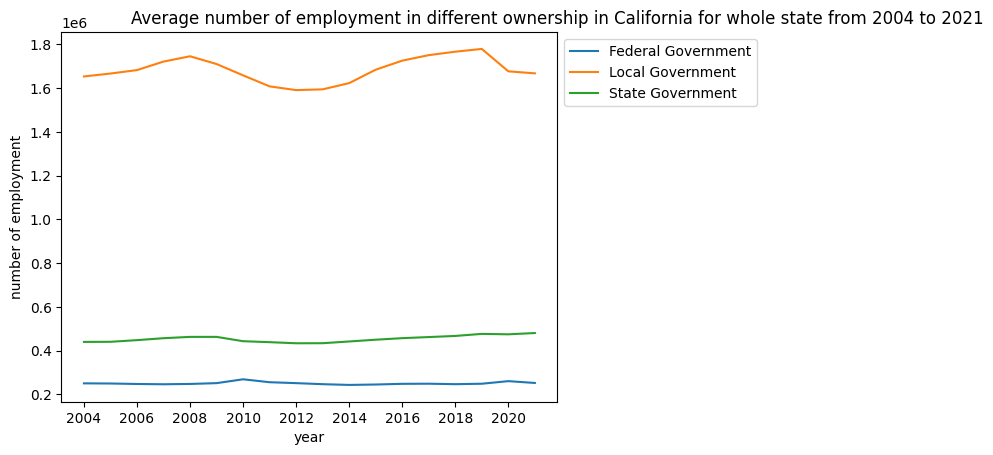

In [ ]:
State_ownership_employment_average=State_ownership_employment_average.drop(level='Ownership',index=["Private"])
for Ownership in ['Federal Government','Local Government','State Government']:
    item=State_ownership_employment_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('number of employment')
plt.xlabel('year')
plt.title("Average number of employment in different ownership in California for whole state from 2004 to 2021",x=1,y=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

In [ ]:
US_ownership_employment_data=US_data[["Year", "Ownership", "Average Monthly Employment"]]
US_ownership_employment_average = US_ownership_employment_data.groupby(['Ownership', 'Year']).mean()
US_ownership_employment_total=US_ownership_employment_average.loc["Total Covered",:]
US_ownership_employment_average=US_ownership_employment_average.drop(level='Ownership',index=["Total Covered"])

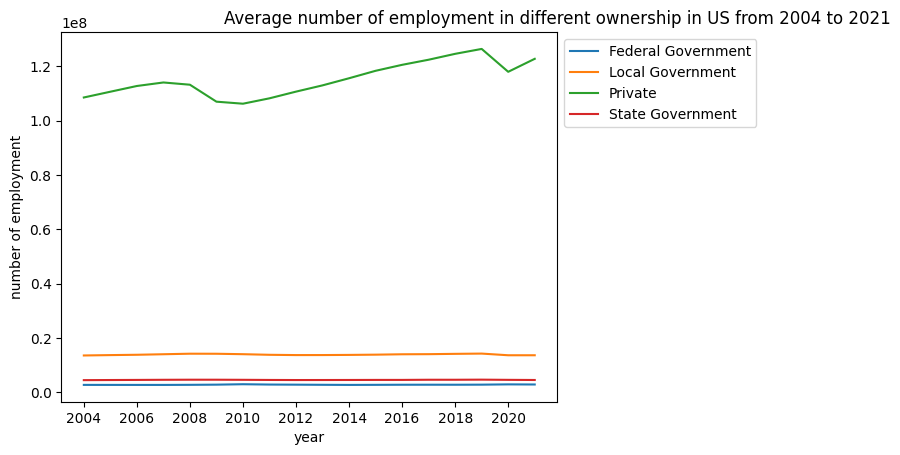

In [ ]:
for Ownership in ['Federal Government','Local Government','Private','State Government']:
    item=US_ownership_employment_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('number of employment')
plt.xlabel('year')
plt.title("Average number of employment in different ownership in US from 2004 to 2021",x=1,y=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

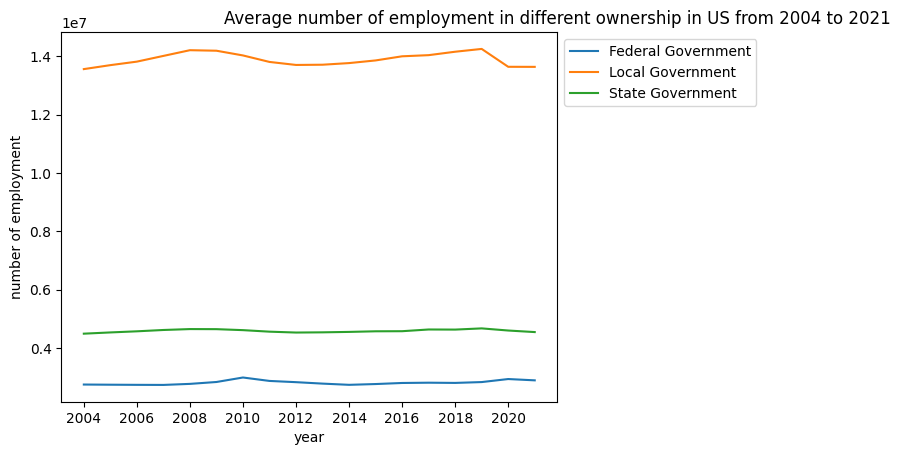

In [ ]:
US_ownership_employment_average=US_ownership_employment_average.drop(level='Ownership',index=["Private"])
for Ownership in ['Federal Government','Local Government','State Government']:
    item=US_ownership_employment_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('number of employment')
plt.xlabel('year')
plt.title("Average number of employment in different ownership in US from 2004 to 2021",x=1,y=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

In [ ]:
State_ownership_employment_total.mean()/US_ownership_employment_total.mean()

Average Monthly Employment    0.116058
dtype: float64

Text(0.5, 1.0, "California's share of employment of the United State")

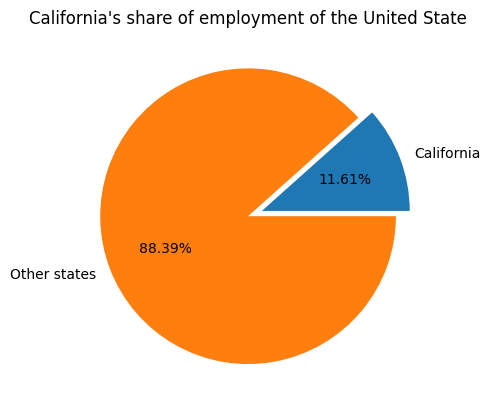

In [ ]:
x=[int(State_ownership_employment_total.mean()),int(US_ownership_employment_total.mean()-State_ownership_employment_total.mean())]
plt.pie(x,labels=["California", "Other states"],autopct="%.2f%%", explode=[0.1,0])
plt.title('California\'s share of employment of the United State')

Text(0.5, 0, 'year')

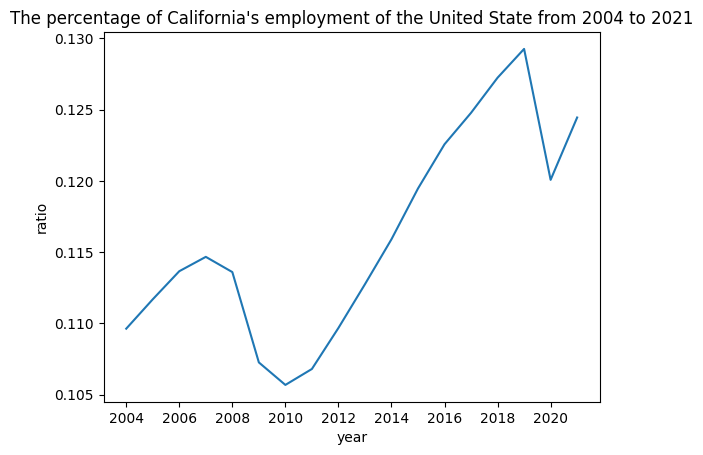

In [ ]:
plt.plot(State_ownership_employment_total/US_ownership_employment_total.mean())
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('The percentage of California\'s employment of the United State from 2004 to 2021')
plt.ylabel('ratio')
plt.xlabel('year')

In [ ]:
State_ownership_Wages_data=State_data[["Year", "Ownership", "Average Weekly Wages"]]
State_ownership_Wages_average = State_ownership_Wages_data.groupby(['Year', 'Ownership']).mean()
US_ownership_Wages_data=US_data[["Year", "Ownership", "Average Weekly Wages"]]
US_ownership_Wages_average = US_ownership_Wages_data.groupby(['Year', 'Ownership']).mean()

In [ ]:
US_ownership_Wages_average

Average Weekly Wages
Year Ownership                               
2004 Federal Government                1111.0
     Local Government                   708.0
     Private                            753.0
     State Government                   791.0
     Total Covered                      757.0
...                                       ...
2021 Private                           1308.0
     State Government                  1324.0
     Total Covered                     1300.0
     Total Government                  1253.0
     Total U.I. Covered                1292.0

[126 rows x 1 columns]

In [ ]:

State_ownership_Wages_average=State_ownership_Wages_average.swaplevel(i=1,j=0).sort_index()
US_ownership_Wages_average=US_ownership_Wages_average.swaplevel(i=1,j=0).sort_index()
State_ownership_Wages_total=State_ownership_Wages_average.loc["Total Covered",:]
US_ownership_Wages_total=US_ownership_Wages_average.loc["Total Covered",:]

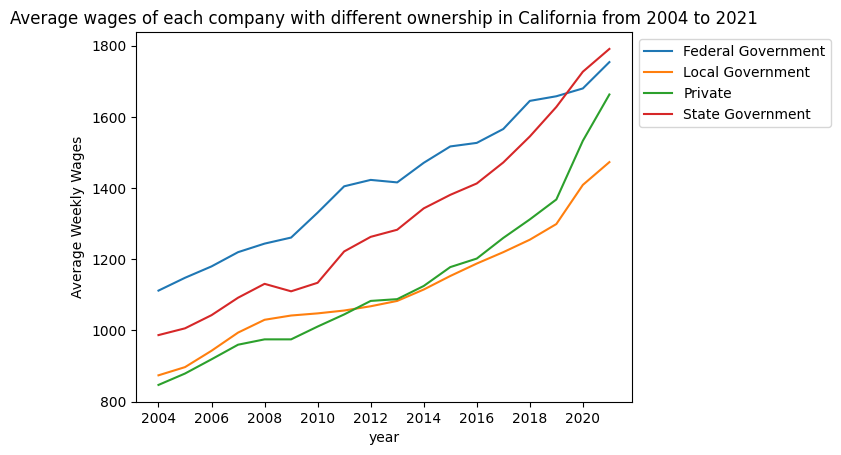

In [ ]:
for Ownership in ['Federal Government','Local Government','Private','State Government']:
    item=State_ownership_Wages_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Average Weekly Wages')
plt.xlabel('year')
plt.title("Average wages of each company with different ownership in California from 2004 to 2021")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

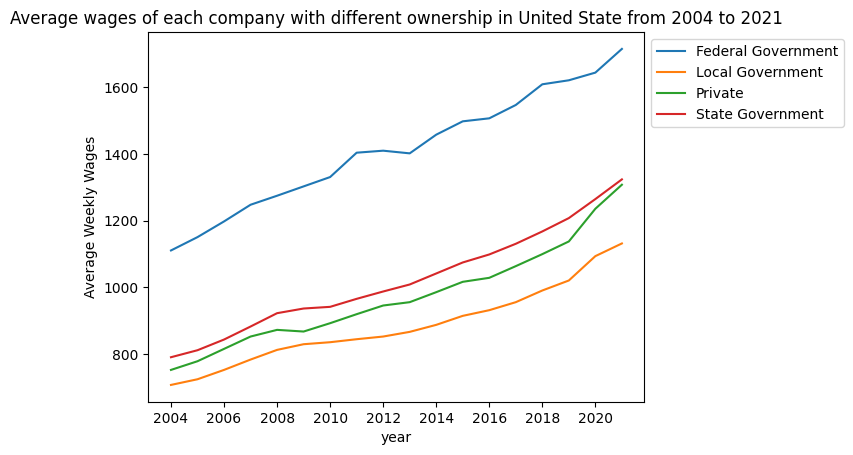

In [ ]:
for Ownership in ['Federal Government','Local Government','Private','State Government']:
    item=US_ownership_Wages_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Average Weekly Wages')
plt.xlabel('year')
plt.title("Average wages of each company with different ownership in United State from 2004 to 2021")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

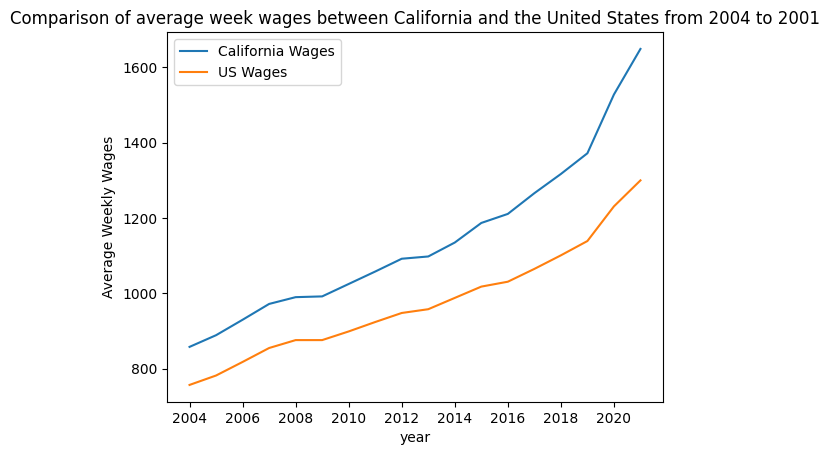

In [ ]:
plt.plot(State_ownership_Wages_total, label='California Wages')
plt.plot(US_ownership_Wages_total, label='US Wages')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Comparison of average week wages between California and the United States from 2004 to 2001')
plt.ylabel('Average Weekly Wages')
plt.xlabel('year')
plt.legend()

In [ ]:
#area type#

In [ ]:
import numpy as np

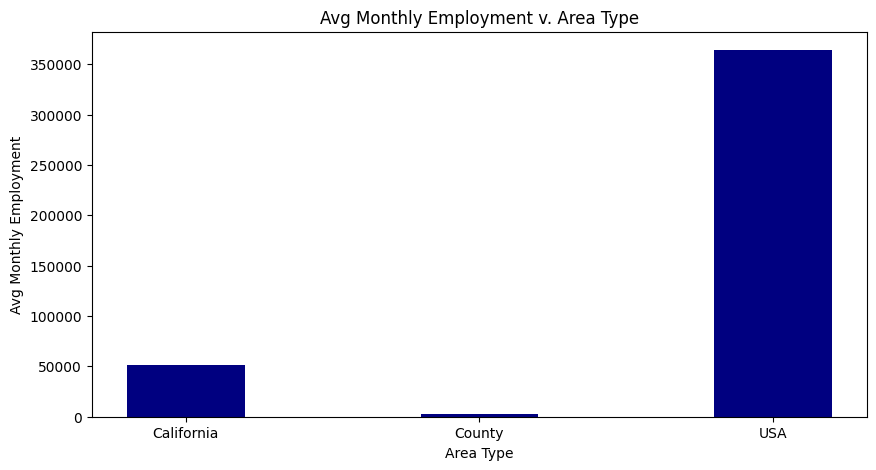

In [ ]:
# Area type vs. Avg Montly Employment

AvgMontlyEmployment = df.groupby("Area Type")["Average Monthly Employment"].apply(list)

caliAME = np.mean(AvgMontlyEmployment[0])
countyAME = np.mean(AvgMontlyEmployment[1])
usaAME = np.mean(AvgMontlyEmployment[2])

monthlyEmpList = [caliAME, countyAME, usaAME]
monthlyEmpTitles = ["California", "County", "USA"]

fig = plt.figure(figsize = (10, 5))
plt.bar(monthlyEmpTitles, monthlyEmpList, color ='navy', width = 0.4)

plt.xlabel("Area Type")
plt.ylabel("Avg Monthly Employment")
plt.title("Avg Monthly Employment v. Area Type")
plt.show()

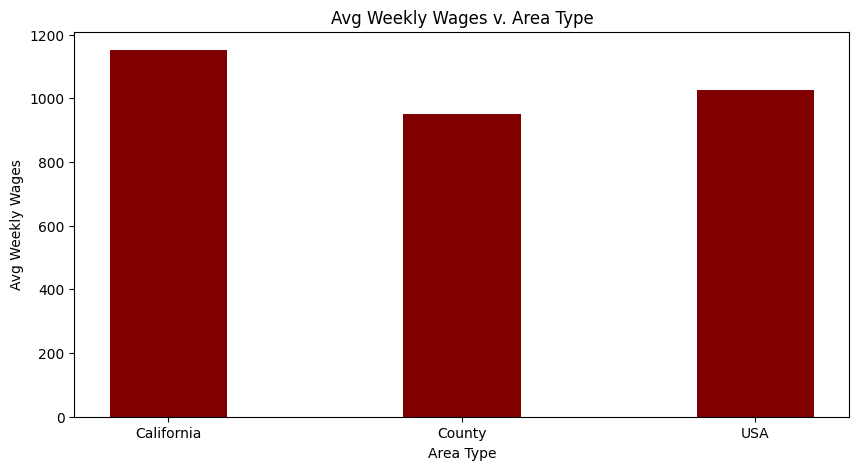

In [ ]:
AvgWeeklyWages = df.groupby("Area Type")["Average Weekly Wages"].apply(list)

caliAWW = np.mean(AvgWeeklyWages[0])
countyAWW = np.mean(AvgWeeklyWages[1])
usaAWW = np.mean(AvgWeeklyWages[2])

weeklyWagesList = [caliAWW, countyAWW, usaAWW]
weeklyWagesTitles = ["California", "County", "USA"]

fig = plt.figure(figsize = (10, 5))
plt.bar(weeklyWagesTitles, weeklyWagesList, color ='maroon', width = 0.4)

plt.xlabel("Area Type")
plt.ylabel("Avg Weekly Wages")
plt.title("Avg Weekly Wages v. Area Type")
plt.show()

Text(0.5, 1.0, 'County Ownership Comparison')

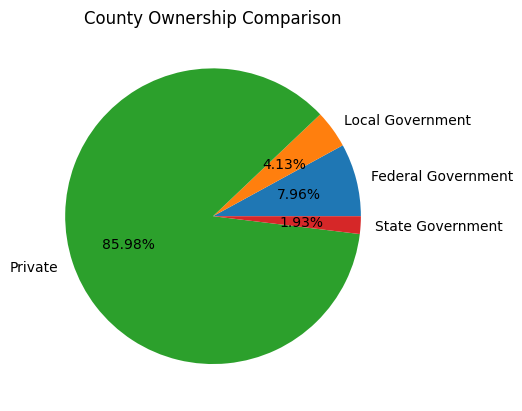

In [ ]:
countyOwnership = df[(df["Area Type"]=="County")& (df["Quarter"]=="Annual") & (df["Industry Name"]!="Total, All Industries")][["Industry Name", "Ownership"]].groupby(['Ownership']).count()
plt.pie(countyOwnership["Industry Name"],labels = countyOwnership.index,autopct="%.2f%%")
plt.title('County Ownership Comparison')

Text(0.5, 1.0, 'United States Ownership Comparison')

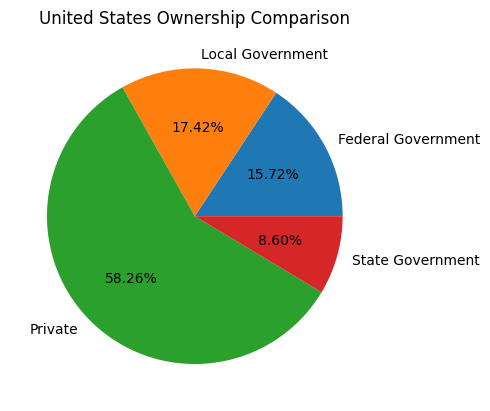

In [ ]:
usOwnership = df[(df["Area Type"]=="United States")& (df["Quarter"]=="Annual") & (df["Industry Name"]!="Total, All Industries")][["Industry Name", "Ownership"]].groupby(['Ownership']).count()
plt.pie(usOwnership["Industry Name"],labels=usOwnership.index,autopct="%.2f%%")
plt.title('United States Ownership Comparison')

Text(0.5, 1.0, 'California Ownership Comparison')

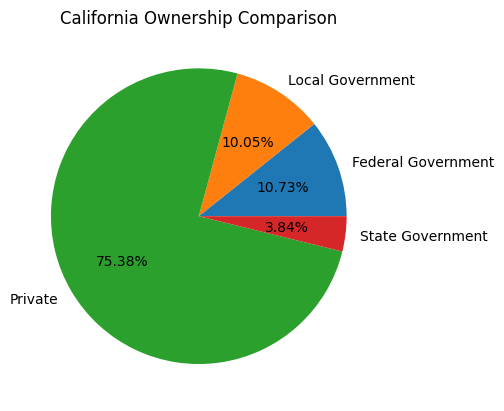

In [ ]:
caOwnership = df[(df["Area Type"]=="California - Statewide")& (df["Quarter"]=="Annual") & (df["Industry Name"]!="Total, All Industries")][["Industry Name", "Ownership"]].groupby(['Ownership']).count()
plt.pie(caOwnership["Industry Name"],labels=caOwnership.index,autopct="%.2f%%")
plt.title('California Ownership Comparison')

In [ ]:
#establishment#

In [ ]:
import seaborn as sns

In [ ]:
data = df[(df["Quarter"]=="Annual") & (df["Industry Name"]!="Total, All Industries")]

In [ ]:
### Area Type & Establishments ###

Text(0.5, 1.0, 'Establishments in California Statewide vs US Nationwide in 2021')

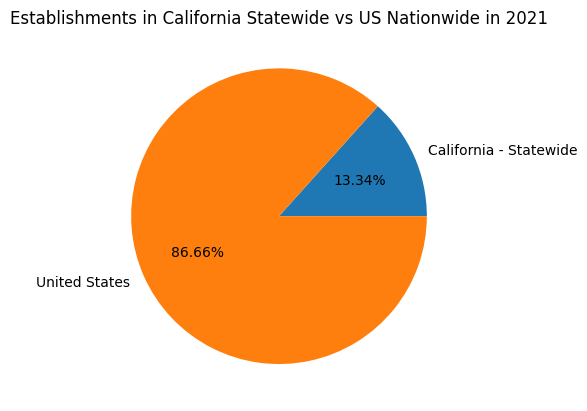

In [ ]:
# United States vs California - Statewide
area_esta = data[(data["Year"]==2021) & ((data["Area Type"]=="United States") | (data["Area Type"]=="California - Statewide"))]
count = area_esta[["Establishments", "Area Type"]].groupby(["Area Type"]).sum()
plt.pie(count["Establishments"], labels=count.index, autopct="%.2f%%")
plt.title("Establishments in California Statewide vs US Nationwide in 2021")

Text(0.5, 1.0, 'Establishments of Different Counties in California in 2021')

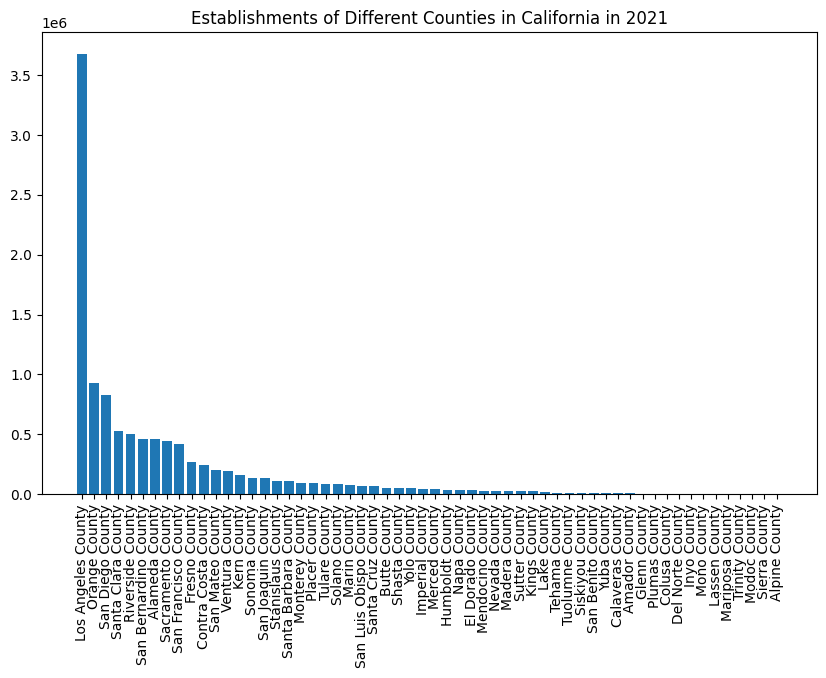

In [ ]:
# different counties
county_esta = data[(data["Year"]==2021) & (data["Area Name"]!="California") & (data["Area Name"]!="United States")]
count = county_esta[["Establishments", "Area Name"]].groupby(["Area Name"]).sum()
xl=list(count.index)
yl=list(map(np.float_, count.values))
x_y = []
for i in range(len(list(count.index))):
    x_y.append((xl[i],yl[i]))
x_y = sorted(x_y, key=lambda x_y:x_y[1], reverse=True)
x = []
y = []
for i in range(len(x_y)):
    x.append(x_y[i][0])
    y.append(x_y[i][1])
x = np.array(x)
y = np.array(y)
fig = plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xticks()
plt.title("Establishments of Different Counties in California in 2021")

In [ ]:
### Ownership & Establishment ###

Text(0.5, 1.0, 'Average Number of Establishments of Different Ownerships in 2021')

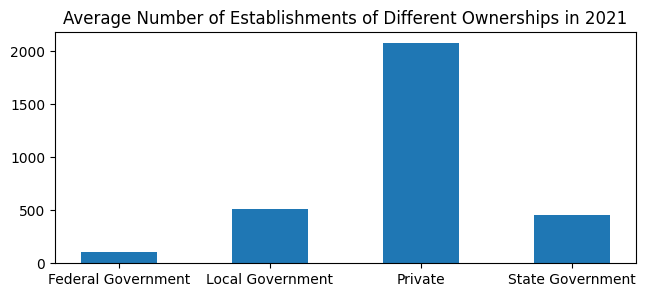

In [ ]:
own_esta = data[(data["Year"]==2021) & (data["Area Type"]!="California - Statewide") & ((data["Ownership"]=="Federal Government") | (data["Ownership"]=="Local Government") | (data["Ownership"]=="Private") | (data["Ownership"]=="State Government"))]
count = own_esta[["Establishments", "Ownership"]].groupby(["Ownership"]).mean()
x = count.index
y = np.array(list(map(np.float_, count.values)))
fig = plt.figure(figsize=(7.5,3))
plt.bar(x,y,width=0.5)
plt.title("Average Number of Establishments of Different Ownerships in 2021")

In [ ]:
### Year & Establishments ###

Text(0.5, 1.0, 'Sum of Establishments by Year in California')

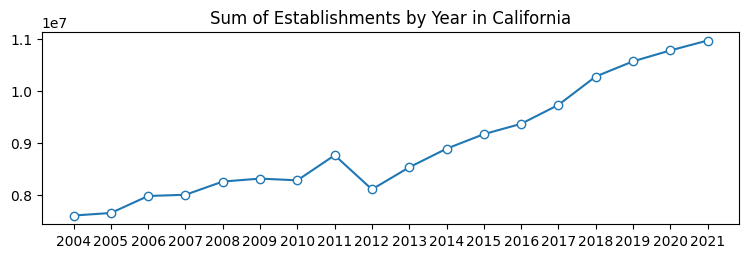

In [ ]:
y_esta = data[(data["Area Type"]=="County")]
count = y_esta[["Establishments", "Year"]].groupby(["Year"]).sum()
fig = plt.figure(figsize=(9,2.5))
x = np.array(list(map(np.str_, count.index)))
y = np.array(list(map(np.int_, count.values)))
plt.plot(x,y,marker='o',mfc='w')
plt.title("Sum of Establishments by Year in California")

In [ ]:
### Correlations ###

Text(0.5, 1.0, 'Avg of Average Monthly Employment by Year in California')

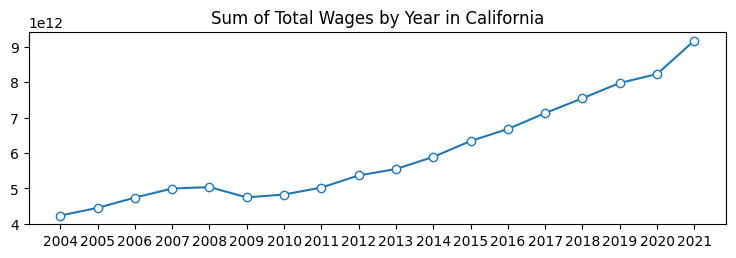

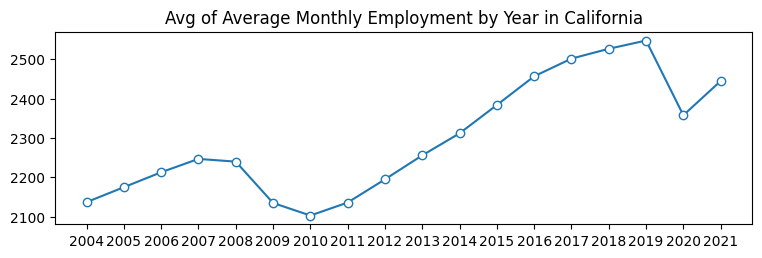

In [ ]:
count_tw = y_esta[["Total Wages (All Workers)", "Year"]].groupby(["Year"]).sum()
y_tw = np.array(list(map(np.int_, count_tw.values)))
fig = plt.figure(figsize=(9,2.5))
plt.plot(x,y_tw,marker='o',mfc='w')
plt.title("Sum of Total Wages by Year in California")

count_ae = y_esta[["Average Monthly Employment", "Year"]].groupby(["Year"]).mean()
y_ae = np.array(list(map(np.int_, count_ae.values)))
fig = plt.figure(figsize=(9,2.5))
plt.plot(x,y_ae,marker='o',mfc='w')
plt.title("Avg of Average Monthly Employment by Year in California")

                            Establishments  Total Wages  \
Establishments                    1.000000     0.979327   
Total Wages                       0.979327     1.000000   
Average Monthly Employment        0.829266     0.859342   

                            Average Monthly Employment  
Establishments                                0.829266  
Total Wages                                   0.859342  
Average Monthly Employment                    1.000000  


<Figure size 600x900 with 0 Axes>

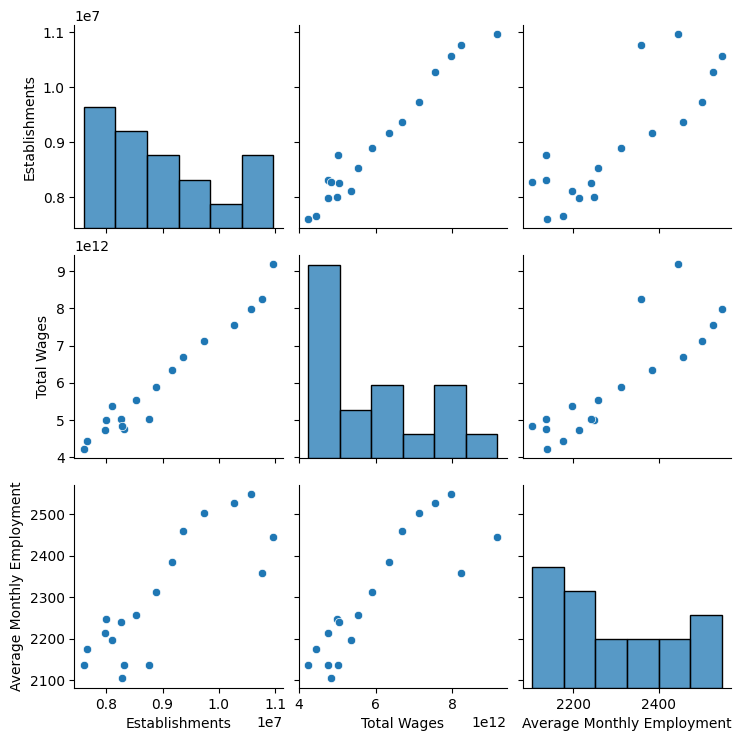

In [ ]:
# between establishments & total wages & average monthly employment
rdic = {}
rdic["Year"] = list(map(np.str_, count.index))
rdic["Establishments"] = [i[0] for i in count.values.tolist()]
rdic["Total Wages"] = [int(i[0]) for i in count_tw.values.tolist()]
rdic["Average Monthly Employment"] = [i[0] for i in count_ae.values.tolist()]

rdf = pd.DataFrame(rdic)
fig = plt.figure(figsize=(6,9))
sns.pairplot(rdf)
print(rdf.corr())

In [2]:
#Time Series Analysis for 3 industries in Alameda County#

# Time Series Analysis for 3 industries in Alameda County:
* Police Protection, State Government\n
* Police Protection, Federal Government\n
* Nursery, Garden & Farm Supply Stores, Private

# Installing and Importing required libraries

In [ ]:
pip install pymannkendall

In [ ]:
pip install kats==0.1 ax-platform==0.2.3 statsmodels==0.12.2

In [7]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
from datetime import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from kats.consts import TimeSeriesData
from kats.utils.decomposition import TimeSeriesDecomposition
from kats.detectors.seasonality import ACFDetector

# Time series Analysis for Alameda County, Industry: Police Protection, NAICS: 92212, Ownership: State Government

In [12]:
emp = []

with open('92212_Alameda_StateGovt.csv', mode ='r') as file:

  csvFile = csv.reader(file)
  for lines in csvFile:
        emp += [int(x) for x in lines[2:5]]
print(emp)

[356, 353, 353, 335, 309, 308, 324, 316, 322, 308, 304, 306, 314, 306, 306, 317, 308, 306, 289, 303, 309, 299, 297, 295, 295, 292, 292, 286, 293, 291, 296, 295, 289, 278, 278, 282, 277, 280, 289, 292, 289, 304, 288, 292, 295, 296, 297, 305, 291, 285, 290, 289, 285, 285, 278, 277, 277, 278, 304, 308, 305, 290, 289, 292, 299, 299, 298, 303, 301, 295, 291, 315, 308, 309, 297, 297, 296, 296, 298, 299, 299, 310, 315, 323, 322, 323, 323, 335, 330, 325, 323, 317, 318, 313, 313, 313, 317, 318, 316, 303, 301, 301, 303, 305, 308, 318, 326, 340, 315, 316, 314, 316, 323, 320, 321, 312, 313, 311, 310, 311, 309, 309, 307, 310, 322, 313, 313, 312, 320, 309, 310, 317, 311, 318, 318, 314, 319, 318, 319, 322, 314, 311, 311, 314, 350, 349, 342, 345, 346, 346, 349, 356, 355, 356, 371, 359, 355, 351, 359, 355, 357, 366, 397, 359, 362, 361, 362, 359, 360, 360, 355, 350, 352, 350, 351, 352, 357, 357, 369, 365, 344, 344, 354, 345, 343, 348, 358, 348, 357, 353, 355, 360, 390, 358, 357, 339, 336, 337, 332, 330,

In [13]:
time = pd.date_range(start='2004',end='2022',periods=len(emp))
emp_series = pd.Series(emp,index=time)

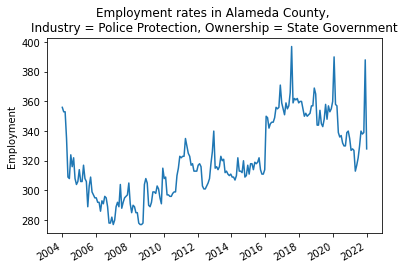

In [14]:
emp_series.plot()
plt.title('Employment rates in Alameda County, \nIndustry = Police Protection, Ownership = State Government')
plt.ylabel('Employment')
plt.show()

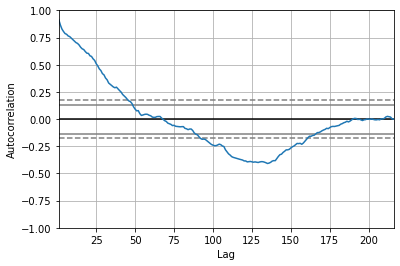

In [15]:
"""
We will find the correlation of the time series with itself at different values of time lag. 
This will provide us information about how many time steps to use for ARIMA time series prediction.
"""
autocorrelation_plot(emp_series)
plt.show()

# Augmented Dickey-Fuller Test to check stationarity
* Null Hypothesis: H0: The time series is non-stationary.
* Alternate Hypothesis: HA: The time series is stationary.

In [16]:
adfuller(emp_series)

(-2.403686240121031,
 0.14069869658388318,
 1,
 214,
 {'1%': -3.4612821203214907,
  '5%': -2.875142613826617,
  '10%': -2.574020122281422},
 1480.0458490796834)

* Test statistic: -2.403686240121031
* P-value: 0.14069869658388318

Since the p-value is not less than .05, we fail to reject the null hypothesis. So the time series is non-stationary. This implies that the series does not have constant mean and variance over different time instants.

# Finding trend in the time series using Mann-Kendall Trend Test
* Null Hypothesis: H0: There is no trend.
* Alterate Hypothesis: HA: There is a trend in the data.

In [18]:
import pymannkendall as mk
mk.original_test(emp_series)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=11.137925934773111, Tau=0.5092592592592593, s=11825.0, var_s=1126990.3333333333, slope=0.2893909301555776, intercept=284.8904750082754)

The p-value is 0, which indicates that there is trend in the data.

# Finding Seasonality
* We decompose the time series into different components: Trend, seasonality, and residual components

In [19]:
df = emp_series.rename("value")
df = df.to_frame()
df.reset_index(inplace=True)
df = df.rename(columns={"index": "time"})
ts = TimeSeriesData(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



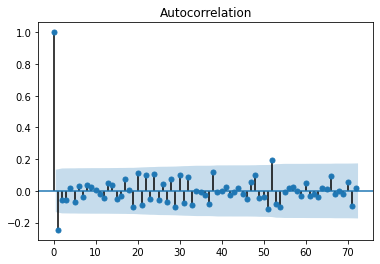

In [20]:
detector = ACFDetector(ts)
detector.detector(diff=1, alpha = 0.01)
detector.plot()

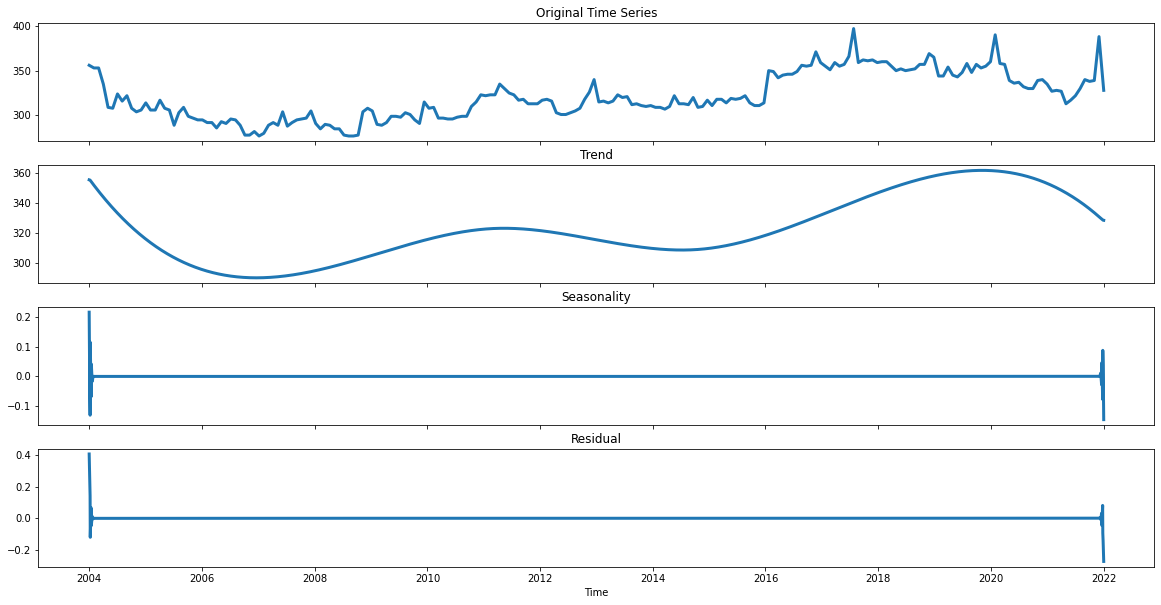

In [21]:
decomposer = TimeSeriesDecomposition(ts, decomposition="additive")
results = decomposer.decomposer()
fig = decomposer.plot()

* We can observe that there is no seasonality in the data. This means the employment rates do not depend much on the quarter and month of the year.
* Fast Fourier Transform Seasonality Detection

In [22]:
from kats.detectors.seasonality import FFTDetector

fft_detector = FFTDetector(ts)
fft_detector.detector()

{'seasonality_presence': False, 'seasonalities': []}

# Time series prediction using ARIMA

In [23]:
# Dividing the data into train(66%) and test(33%) sets
size = int(0.66 * len(emp_series))
train, test = emp_series.values[0:size], emp_series.values[size:len(emp_series)]

In [24]:
history = list(train)
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(25,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=311.848379, expected=311.000000
predicted=314.161209, expected=314.000000
predicted=312.396377, expected=350.000000
predicted=348.354536, expected=349.000000
predicted=340.136214, expected=342.000000
predicted=337.307275, expected=345.000000
predicted=342.953027, expected=346.000000
predicted=341.433100, expected=346.000000
predicted=348.392272, expected=349.000000
predicted=348.223922, expected=356.000000
predicted=355.204254, expected=355.000000
predicted=356.172292, expected=356.000000
predicted=351.286514, expected=371.000000
predicted=367.718723, expected=359.000000
predicted=358.703797, expected=355.000000
predicted=361.457520, expected=351.000000
predicted=351.833806, expected=359.000000
predicted=359.663378, expected=355.000000
predicted=356.555534, expected=357.000000
predicted=358.412137, expected=366.000000
predicted=363.125754, expected=397.000000
predicted=396.752152, expected=359.000000
predicted=363.459410, expected=362.000000
predicted=364.685998, expected=361

Test RMSE: 14.235


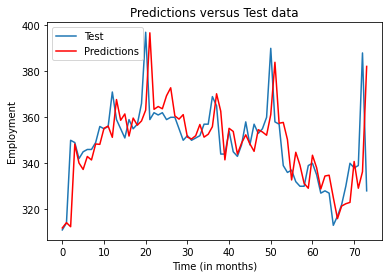

In [25]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' %rmse)

plt.plot(test, label="Test")
plt.plot(predictions, color='red',label="Predictions")
plt.legend(loc="upper left")
plt.title('Predictions versus Test data')
plt.ylabel('Employment')
plt.xlabel('Time (in months)')
plt.show()

In [26]:
s1 = pd.Series(test)
s2 = pd.Series(predictions)
print(s1.corr(s2, method='pearson'))

0.616364214354266


# Time series Analysis for Alameda County, Industry: Police Protection, NAICS: 92212, Ownership: Federal Government

In [27]:
emp = []

with open('92212_Alameda_FederalGovt.csv', mode ='r') as file:

  csvFile = csv.reader(file)
  for lines in csvFile:
        emp += [int(x) for x in lines[2:5]]
print(emp)

[278, 276, 282, 283, 278, 280, 269, 278, 284, 295, 295, 298, 301, 302, 304, 351, 351, 346, 351, 355, 359, 354, 353, 349, 348, 348, 350, 348, 350, 350, 350, 349, 342, 343, 342, 327, 326, 331, 364, 369, 368, 389, 377, 380, 378, 377, 386, 383, 386, 386, 388, 389, 386, 378, 385, 389, 397, 411, 411, 412, 397, 397, 396, 398, 416, 414, 418, 416, 414, 426, 432, 432, 436, 443, 438, 434, 443, 440, 439, 443, 446, 449, 448, 456, 459, 462, 458, 457, 461, 455, 457, 454, 443, 440, 450, 439, 442, 445, 448, 453, 452, 449, 447, 451, 451, 486, 498, 456, 459, 460, 465, 469, 470, 461, 462, 461, 459, 459, 455, 456, 455, 461, 449, 471, 472, 466, 471, 467, 461, 466, 465, 462, 463, 465, 465, 460, 460, 453, 452, 453, 455, 461, 462, 458, 483, 486, 478, 480, 481, 485, 487, 492, 499, 490, 504, 518, 525, 506, 497, 496, 498, 485, 484, 477, 479, 482, 476, 475, 463, 456, 454, 460, 451, 433, 431, 426, 422, 416, 431, 424, 428, 432, 426, 428, 419, 425, 418, 414, 409, 421, 407, 392, 404, 404, 411, 407, 408, 412, 405, 405,

In [28]:
time = pd.date_range(start='2004',end='2022',periods=len(emp))
emp_series = pd.Series(emp,index=time)

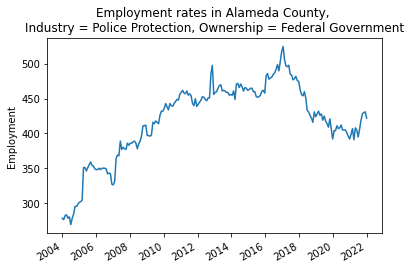

In [29]:
emp_series.plot()
plt.title('Employment rates in Alameda County, \nIndustry = Police Protection, Ownership = Federal Government')
plt.ylabel('Employment')
plt.show()

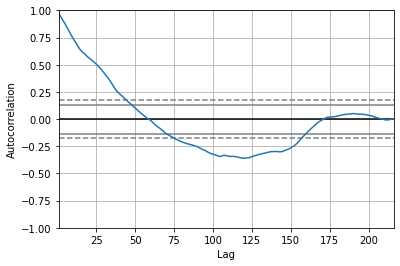

In [30]:
autocorrelation_plot(emp_series)
plt.show()

# Augmented Dickey-Fuller Test to check stationarity
* Null Hypothesis: H0: The time series is non-stationary.
* Alterate Hypothesis: HA: The time series is stationary.

In [31]:
adfuller(emp_series)

(-2.673978895930301,
 0.07865030367425219,
 2,
 213,
 {'1%': -3.461429147102264,
  '5%': -2.875206950587861,
  '10%': -2.5740544497344002},
 1414.4762145890663)

* Test statistic: -2.673978895930301
* P-value: 0.07865030367425219

Since the p-value is not less than .05, we fail to reject the null hypothesis. So the time series is non-stationary. This implies that the series does not have constant mean and variance over different time instants.

# Finding trend in the time series using Mann-Kendall Trend Test
* Null Hypothesis: H0: There is no trend.
* Alterate Hypothesis: HA: There is a trend in the data.

In [32]:
import pymannkendall as mk
mk.original_test(emp_series)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=9.079562476621971, Tau=0.4152024117140396, s=9641.0, var_s=1127260.3333333333, slope=0.6206896551724138, intercept=363.7758620689655)

The p-value is 0, which indicates that there is trend in the data.

# Finding Seasonality

In [33]:
df = emp_series.rename("value")
df = df.to_frame()
df.reset_index(inplace=True)
df = df.rename(columns={"index": "time"})
ts = TimeSeriesData(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



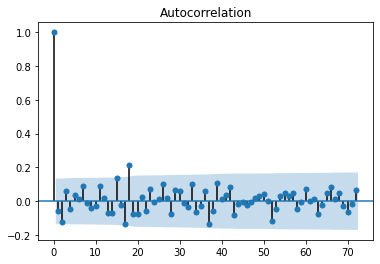

In [34]:
detector = ACFDetector(ts)
detector.detector(diff=1, alpha = 0.1)
detector.plot()

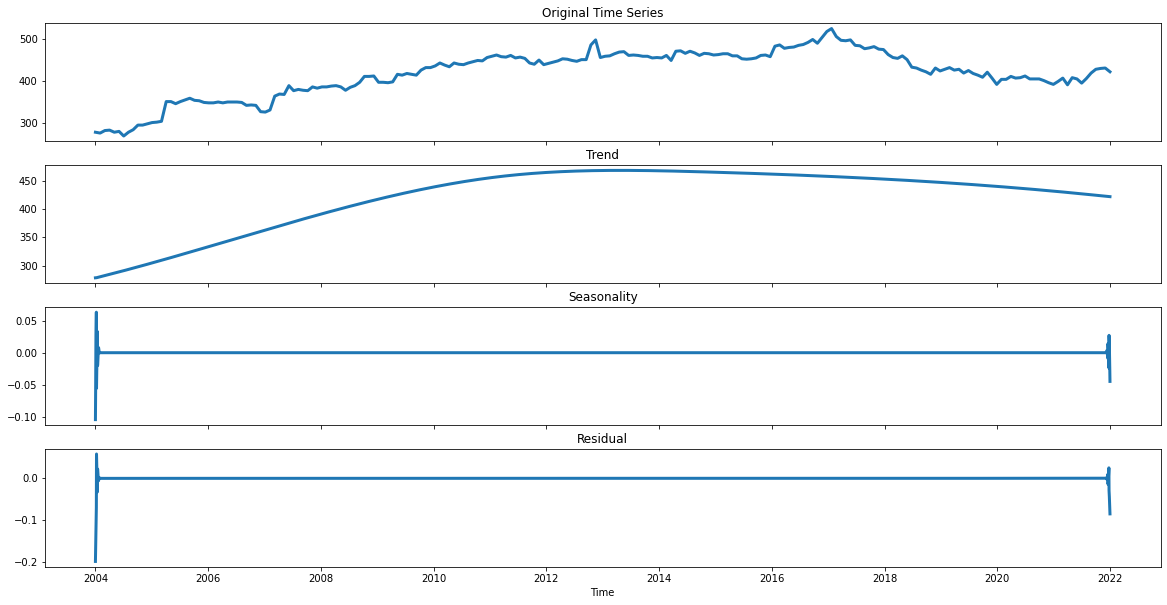

In [35]:
decomposer = TimeSeriesDecomposition(ts, decomposition="additive")
results = decomposer.decomposer()
fig = decomposer.plot()

* We can observe that there is no seasonality in the data. This means the employment rates do not depend much on the quarter and month of the year.
* Fast Fourier Transform Seasonality Detection

In [36]:
from kats.detectors.seasonality import FFTDetector

fft_detector = FFTDetector(ts)
fft_detector.detector()

{'seasonality_presence': False, 'seasonalities': []}

# Time series prediction using ARIMA

In [37]:
size = int(0.66 * len(emp_series))
train, test = emp_series.values[0:size], emp_series.values[size:len(emp_series)]

In [38]:
history = list(train)
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(25,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=461.918610, expected=462.000000
predicted=455.139218, expected=458.000000
predicted=464.117997, expected=483.000000
predicted=477.961627, expected=486.000000
predicted=485.223160, expected=478.000000
predicted=480.157434, expected=480.000000
predicted=479.724022, expected=481.000000
predicted=482.113402, expected=485.000000
predicted=484.633059, expected=487.000000
predicted=489.483627, expected=492.000000
predicted=490.777964, expected=499.000000
predicted=497.827776, expected=490.000000
predicted=487.561640, expected=504.000000
predicted=505.129589, expected=518.000000
predicted=515.817323, expected=525.000000
predicted=525.808712, expected=506.000000
predicted=499.079431, expected=497.000000
predicted=506.245490, expected=496.000000
predicted=492.961904, expected=498.000000
predicted=498.920983, expected=485.000000
predicted=491.251389, expected=484.000000
predicted=486.243230, expected=477.000000
predicted=471.538059, expected=479.000000
predicted=484.572879, expected=482

Test RMSE: 8.703


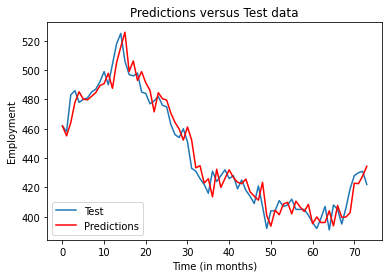

In [39]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' %rmse)

plt.plot(test, label="Test")
plt.plot(predictions, color='red',label="Predictions")
plt.legend(loc="lower left")
plt.title('Predictions versus Test data')
plt.ylabel('Employment')
plt.xlabel('Time (in months)')
plt.show()

In [40]:
s1 = pd.Series(test)
s2 = pd.Series(predictions)
print(s1.corr(s2, method='pearson'))

0.9728278870255008


# Time series Analysis for Alameda County, Industry: Nursery, Garden & Farm Supply Stores, NAICS: 44422, Ownership: Private

In [41]:
emp = []

with open('44422_Alameda_Private.csv', mode ='r') as file:

  csvFile = csv.reader(file)
  for lines in csvFile:
        emp += [int(x) for x in lines[2:5]]
print(emp)

[282, 285, 299, 319, 320, 316, 313, 306, 305, 310, 309, 305, 299, 303, 320, 342, 335, 343, 343, 341, 341, 328, 319, 322, 307, 307, 321, 309, 318, 321, 324, 323, 315, 317, 319, 309, 297, 302, 322, 339, 337, 351, 357, 349, 342, 336, 328, 337, 297, 302, 320, 324, 328, 337, 322, 311, 305, 290, 289, 275, 252, 254, 258, 257, 265, 277, 264, 263, 253, 250, 254, 248, 262, 255, 298, 334, 337, 330, 309, 300, 298, 295, 290, 289, 280, 285, 300, 324, 333, 331, 322, 323, 312, 317, 312, 302, 299, 309, 341, 342, 340, 348, 358, 344, 354, 353, 351, 347, 304, 305, 324, 334, 348, 341, 341, 334, 331, 305, 303, 302, 309, 311, 326, 339, 338, 330, 330, 327, 321, 318, 308, 314, 304, 308, 330, 352, 353, 355, 334, 329, 327, 328, 320, 321, 272, 279, 297, 309, 309, 309, 313, 298, 290, 305, 301, 305, 290, 309, 333, 338, 346, 356, 355, 352, 353, 339, 348, 343, 312, 334, 344, 370, 376, 366, 364, 361, 352, 367, 359, 342, 340, 344, 358, 376, 393, 395, 383, 375, 362, 352, 348, 346, 330, 330, 330, 261, 318, 343, 347, 349,

In [42]:
time = pd.date_range(start='2004',end='2022',periods=len(emp))
emp_series = pd.Series(emp,index=time)

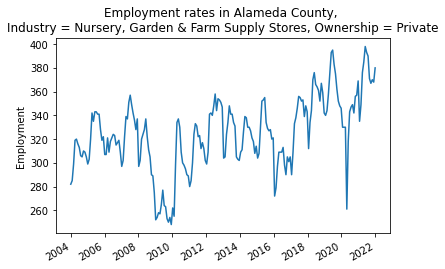

In [43]:
emp_series.plot()
plt.title('Employment rates in Alameda County, \nIndustry = Nursery, Garden & Farm Supply Stores, Ownership = Private')
plt.ylabel('Employment')
plt.show()

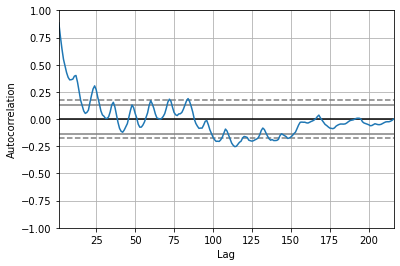

In [44]:
"""
We will find the correlation of the time series with itself at different values of time lag. 
This will provide us information about seasonality if there are peaks at regular time intervals.
"""
autocorrelation_plot(emp_series)
plt.show()

* We can see in the autocorrelation plot that there are peaks after every 12 months.

In [45]:
df = emp_series.rename("value")
df = df.to_frame()
df.reset_index(inplace=True)
df = df.rename(columns={"index": "time"})
ts = TimeSeriesData(df)

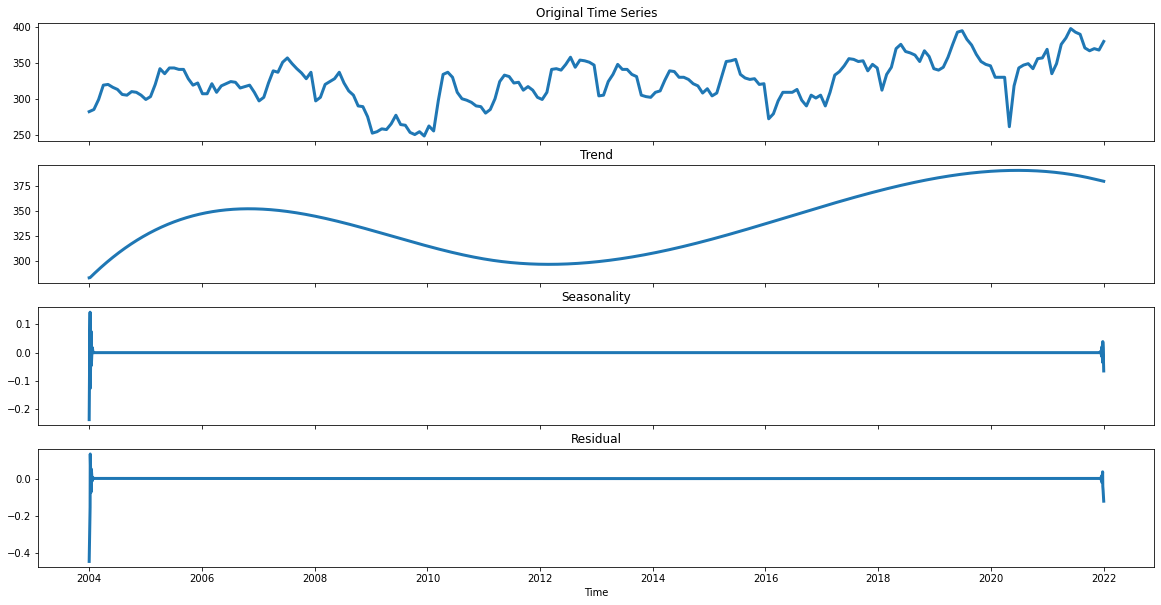

In [46]:
decomposer = TimeSeriesDecomposition(ts, decomposition="additive")
results = decomposer.decomposer()
fig = decomposer.plot()

* We cannot observe any clear seasonality in the data

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



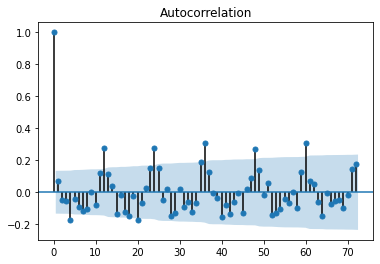

In [47]:
detector = ACFDetector(ts)
detector.detector(diff=1, alpha = 0.1)
detector.plot()

* We can observe peaks in the autocorrelation plot at intervals of 12,24,36,48,...
* While there is no clear seasonality present in the time series as determined by the seasonality test, it can be observed that the Employment rates do repeat themselves every 12 months i.e. every year.